<a href="https://colab.research.google.com/github/sanaomaro/datainsight/blob/main/SANA_ReDi_Project_Cellular_network_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
suraj520_cellular_network_performance_data_path = kagglehub.dataset_download('suraj520/cellular-network-performance-data')

print('Data source import complete.')


Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import signal
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cellular-network-performance-data/.nfs00000000221655fb000000d0
/kaggle/input/cellular-network-performance-data/train.csv


In [8]:
df = pd.read_csv(r'/kaggle/input/cellular-network-performance-data/train.csv')
df.head(10)

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing
0,2022-01-03 17:46:13,-84.119763,25.940082,1713.800550,urban,14.690438,2.243176,5,25,data,incoming
1,2022-01-04 17:29:31,-87.806131,15.937354,345.371848,home,6.213698,5.002566,3,22,voice,incoming
2,2022-01-05 17:14:01,-116.575176,14.709384,259.285043,open,4.494415,8.705974,2,5,voice,incoming
3,2022-01-06 16:02:29,-82.961183,21.727165,357.974004,home,7.619957,7.427025,5,33,data,outgoing
4,2022-01-07 22:19:17,-85.012574,26.058158,398.006716,urban,10.655159,0.612071,5,8,voice,outgoing
5,2022-01-08 22:31:42,-98.618692,20.606738,1795.175137,urban,5.622202,4.702561,6,42,data,outgoing
6,2022-01-09 20:39:41,-74.139399,15.533144,230.320247,suburban,7.636230,1.667293,1,74,voice,outgoing
7,2022-01-10 22:03:26,-50.235331,23.898983,462.112568,open,0.441029,1.165779,7,16,data,incoming
8,2022-01-11 10:15:37,-70.103073,20.070370,1697.423365,suburban,5.298498,7.678126,8,7,voice,outgoing
9,2022-01-12 13:31:29,-97.600564,23.437814,1311.066526,home,1.235894,4.972049,8,74,data,incoming


In [9]:
df.describe()

,Signal Strength (dBm),SNR,Call Duration (s),Attenuation,Distance to Tower (km),Tower ID,User ID
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,-84.957137,19.834262,895.324971,5.459605,5.064669,5.531317,52.198704
std,14.349536,5.579039,529.838188,3.502259,2.956370,2.837327,27.969438
min,-118.681318,10.271411,11.520904,0.042255,0.026375,1.000000,1.000000
25%,-95.936519,14.857527,418.499303,2.815069,2.509455,3.000000,29.000000
50%,-84.230276,19.584328,910.509884,4.758147,5.183831,6.000000,54.000000
75%,-74.430044,24.648712,1362.754612,7.573055,7.708894,8.000000,75.500000
max,-50.122222,29.963213,1795.175137,14.939793,9.981806,10.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               463 non-null    object 
 1   Signal Strength (dBm)   463 non-null    float64
 2   SNR                     463 non-null    float64
 3   Call Duration (s)       463 non-null    float64
 4   Environment             463 non-null    object 
 5   Attenuation             463 non-null    float64
 6   Distance to Tower (km)  463 non-null    float64
 7   Tower ID                463 non-null    int64  
 8   User ID                 463 non-null    int64  
 9   Call Type               463 non-null    object 
 10  Incoming/Outgoing       463 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 39.9+ KB


In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Tower ID'] = df['Tower ID'].astype('category')
df['User ID'] = df['User ID'].astype('category')
#coeerce will change it to NaT which is undesirable in this case
#so we check what calue does this colum contain and change accordingly

ValueError: day is out of range for month, at position 422. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
df['Timestamp'].iloc[422]

'2022-02-29 12:08:52'

In [13]:
the_str = df['Timestamp'].iloc[422]
corrected_str = the_str[:8] + '28' + the_str[10:]


In [15]:
df.loc[422, 'Timestamp'] = corrected_str

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Tower ID'] = df['Tower ID'].astype('category')
df['User ID'] = df['User ID'].astype('category')

df['Environment'] = df['Environment'].astype('category')
df['Call Type'] = df['Call Type'].astype('category')
df['Incoming/Outgoing'] = df['Incoming/Outgoing'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               463 non-null    datetime64[ns]
 1   Signal Strength (dBm)   463 non-null    float64       
 2   SNR                     463 non-null    float64       
 3   Call Duration (s)       463 non-null    float64       
 4   Environment             463 non-null    category      
 5   Attenuation             463 non-null    float64       
 6   Distance to Tower (km)  463 non-null    float64       
 7   Tower ID                463 non-null    category      
 8   User ID                 463 non-null    category      
 9   Call Type               463 non-null    category      
 10  Incoming/Outgoing       463 non-null    category      
dtypes: category(5), datetime64[ns](1), float64(5)
memory usage: 27.7 KB


In [18]:
print(df.isnull().sum())

Timestamp                 0
Signal Strength (dBm)     0
SNR                       0
Call Duration (s)         0
Environment               0
Attenuation               0
Distance to Tower (km)    0
Tower ID                  0
User ID                   0
Call Type                 0
Incoming/Outgoing         0
dtype: int64


In [19]:
env_types = df['Environment'].value_counts()
env_types

,count
Environment,
open,132
urban,111
home,110
suburban,110


In [20]:
df['Environment'].nunique()


4

In [21]:
towers_no = df['Tower ID'].value_counts().sort_index()
towers_no

,count
Tower ID,
1,43
2,53
3,38
4,41
5,52
6,46
7,53
8,48
9,47


In [22]:
df['Tower ID'].nunique()


10

In [23]:
Users_no = df['User ID'].value_counts().sort_index()
Users_no

,count
User ID,
1,2
2,7
3,5
4,3
5,5
...,...
96,3
97,3
98,3


In [24]:
df['User ID'].nunique()


99

In [25]:
environment = df.groupby(by="Environment", sort=True).size()
environment

<ipython-input-25-315d84b018a9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  environment = df.groupby(by="Environment", sort=True).size()


,0
Environment,
home,110
open,132
suburban,110
urban,111


In [26]:
#we rename environemnt types according to industry standards
env_map = {
    'open': 'rural',
    'home': 'indoor',
    'suburban': 'suburban',
    'urban': 'urban'
}
df['Env_Std'] = df['Environment'].map(env_map)

In [27]:
df['Location_Type'] = df['Env_Std'].apply(
    lambda x: 'indoor' if x == 'indoor' else 'outdoor'
)

In [28]:
df.head()

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing,Env_Std,Location_Type
0,2022-01-03 17:46:13,-84.119763,25.940082,1713.800550,urban,14.690438,2.243176,5,25,data,incoming,urban,outdoor
1,2022-01-04 17:29:31,-87.806131,15.937354,345.371848,home,6.213698,5.002566,3,22,voice,incoming,indoor,indoor
2,2022-01-05 17:14:01,-116.575176,14.709384,259.285043,open,4.494415,8.705974,2,5,voice,incoming,rural,outdoor
3,2022-01-06 16:02:29,-82.961183,21.727165,357.974004,home,7.619957,7.427025,5,33,data,outgoing,indoor,indoor
4,2022-01-07 22:19:17,-85.012574,26.058158,398.006716,urban,10.655159,0.612071,5,8,voice,outgoing,urban,outdoor


In [29]:
dfc = df.copy()

In [30]:
dfc.head()

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing,Env_Std,Location_Type
0,2022-01-03 17:46:13,-84.119763,25.940082,1713.800550,urban,14.690438,2.243176,5,25,data,incoming,urban,outdoor
1,2022-01-04 17:29:31,-87.806131,15.937354,345.371848,home,6.213698,5.002566,3,22,voice,incoming,indoor,indoor
2,2022-01-05 17:14:01,-116.575176,14.709384,259.285043,open,4.494415,8.705974,2,5,voice,incoming,rural,outdoor
3,2022-01-06 16:02:29,-82.961183,21.727165,357.974004,home,7.619957,7.427025,5,33,data,outgoing,indoor,indoor
4,2022-01-07 22:19:17,-85.012574,26.058158,398.006716,urban,10.655159,0.612071,5,8,voice,outgoing,urban,outdoor


In [31]:
print("QUICK INTUITION - Network Health Snapshot:")
print(f"Avg Signal Strength: {df['Signal Strength (dBm)'].mean():.1f} dBm")
print(f"Critical Signal Areas: {len(df[df['Signal Strength (dBm)'] < -95])} records")
print(f"Worst Tower: {df.groupby('Tower ID')['Signal Strength (dBm)'].mean().idxmin()}")
print(f"Best Environment: {df.groupby('Environment')['SNR'].mean().idxmax()}")

QUICK INTUITION - Network Health Snapshot:
Avg Signal Strength: -85.0 dBm
Critical Signal Areas: 128 records
Worst Tower: 4
Best Environment: home


<ipython-input-31-86b12418da89>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"Worst Tower: {df.groupby('Tower ID')['Signal Strength (dBm)'].mean().idxmin()}")
<ipython-input-31-86b12418da89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"Best Environment: {df.groupby('Environment')['SNR'].mean().idxmax()}")


In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

In [33]:
#Counting Towers per Environment
towers_per_environment = (
    dfc.groupby('Environment')['Tower ID']
    .nunique()
    .reset_index()
    .rename(columns={'Tower ID': 'Tower Count'})
)
towers_per_environment

,Environment,Tower Count
0,home,10
1,open,10
2,suburban,10
3,urban,10


In [34]:
#users could appear in multiple environment so we count users per towers or per environemtn - we donot count users per tower per environment - to avoid repetition and illogical conclusions
users_per_tower = (
    dfc.groupby('Tower ID')['User ID']
    .nunique()
    .reset_index(name='Distinct Users')
)
users_per_tower

,Tower ID,Distinct Users
0,1,34
1,2,42
2,3,33
3,4,35
4,5,41
5,6,36
6,7,37
7,8,38
8,9,38
9,10,31


In [35]:
users_per_envi = (
    dfc.groupby('Environment')['User ID']
    .nunique()
    .reset_index(name='Distinct Users')
)
users_per_envi

,Environment,Distinct Users
0,home,67
1,open,78
2,suburban,70
3,urban,62


In [36]:
out = dfc.pivot_table(
    index='Tower ID',
    columns='Environment',
    values='User ID',
    aggfunc='count',
    fill_value=0,
    margins=True
)

print(out)

Environment  home  open  suburban  urban  All
Tower ID                                     
1              10    14        11      8   43
2              12    17         9     15   53
3              10    12         8      8   38
4               7    11        14      9   41
5              15    13        12     12   52
6              11    12         6     17   46
7              10    16        13     14   53
8              10    15        10     13   48
9              11    14        13      9   47
10             14     8        14      6   42
All           110   132       110    111  463


In [37]:
cross_tab = pd.crosstab(
    index=dfc['Tower ID'],
    columns=dfc['Environment'],
    values=dfc['User ID'],
    aggfunc=pd.Series.count,
    #aggfunc=pd.Series.nunique,
    margins=True,
    margins_name='Total'
)
cross_tab = cross_tab.astype(int).fillna(0)

print(cross_tab)

Environment  home  open  suburban  urban  Total
Tower ID                                       
1              10    14        11      8     43
2              12    17         9     15     53
3              10    12         8      8     38
4               7    11        14      9     41
5              15    13        12     12     52
6              11    12         6     17     46
7              10    16        13     14     53
8              10    15        10     13     48
9              11    14        13      9     47
10             14     8        14      6     42
Total         110   132       110    111    463


In [38]:
#CHECK IF THERE ARE ANY SHARED TOWERS BETWEEN ENVIRONEMNTS
dfc['Is_Duplicate'] = dfc.duplicated(keep=False)

duplicate_count = dfc['Is_Duplicate'].sum()
print(f"Total shared towers: {duplicate_count}")

dup_rows = dfc[dfc['Is_Duplicate']]
print(dup_rows)

Total shared towers: 0
Empty DataFrame
Columns: [Timestamp, Signal Strength (dBm), SNR, Call Duration (s), Environment, Attenuation, Distance to Tower (km), Tower ID, User ID, Call Type, Incoming/Outgoing, Env_Std, Location_Type, Is_Duplicate]
Index: []


In [39]:
#Tower Coverage Areas
tower_cover = (
    dfc.groupby('Tower ID')
    .agg(
        Environments_Served=('Environment', 'nunique'),
        Environment_List=('Environment', lambda x: list(x.unique()))
    )
    .reset_index()
)
tower_cover

,Tower ID,Environments_Served,Environment_List
0,1,4,"[suburban, urban, open, home]"
1,2,4,"[open, suburban, urban, home]"
2,3,4,"[home, suburban, urban, open]"
3,4,4,"[home, urban, open, suburban]"
4,5,4,"[urban, home, open, suburban]"
5,6,4,"[urban, home, open, suburban]"
6,7,4,"[open, home, suburban, urban]"
7,8,4,"[suburban, home, urban, open]"
8,9,4,"[open, suburban, home, urban]"
9,10,4,"[home, suburban, urban, open]"


In [42]:
#Counting calls (voices and data) per Environment

calls_per_env = (
    dfc.groupby(['Environment', 'Call Type'])
    .size()
    .unstack(fill_value=0)  # convert to columns
    .reset_index()
    .rename(columns={'voice': 'Voice Calls', 'data': 'Data Sessions'})
)
calls_per_env['Total Calls'] = calls_per_env['Voice Calls'] + calls_per_env['Data Sessions']
calls_per_env['Voice %'] = (calls_per_env['Voice Calls'] / calls_per_env['Total Calls'] * 100).round(1)
calls_per_env['Data %'] = (calls_per_env['Data Sessions'] / calls_per_env['Total Calls'] * 100).round(1)

duration_sum = (
    dfc.groupby(['Environment', 'Call Type'])['Call Duration (s)']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={'voice': 'Voice Duration (s)', 'data': 'Data Duration (s)'})
    .reset_index()
)
calls_per_env = calls_per_env.merge(duration_sum, on='Environment')
avgsignal = dfc.groupby('Environment')['Signal Strength (dBm)'].mean().round(1)
calls_per_env = calls_per_env.set_index('Environment')
calls_per_env['Avg Signal (dBm)'] = avgsignal
calls_per_env = calls_per_env.reset_index()  # Restore integer index

calls_per_env



Call Type,Environment,Data Sessions,Voice Calls,Total Calls,Voice %,Data %,Data Duration (s),Voice Duration (s),Avg Signal (dBm)
0,home,53,57,110,51.8,48.2,51857.198419,47146.683874,-79.5
1,open,65,67,132,50.8,49.2,60035.590755,54462.260202,-84.0
2,suburban,53,57,110,51.8,48.2,44831.694542,52577.854415,-85.8
3,urban,66,45,111,40.5,59.5,58776.091129,44848.088059,-90.6


```
# #----------------- AI SOLUTION ------------------
# Create comprehensive summary in one step
summary = (
    dfc.groupby('Environment')
    .agg(
        Voice_Calls=('Call Type', lambda x: (x == 'voice').sum()),
        Data_Sessions=('Call Type', lambda x: (x == 'data').sum()),
        Voice_Duration=('Call Duration (s)', lambda x: x[dfc['Call Type'] == 'voice'].sum()),
        Data_Duration=('Call Duration (s)', lambda x: x[dfc['Call Type'] == 'data'].sum()),
        Avg_Signal=('Signal Strength (dBm)', 'mean')
    )
    .reset_index()
)

# Calculate percentages
summary['Total_Calls'] = summary['Voice_Calls'] + summary['Data_Sessions']
summary['Voice_%'] = (summary['Voice_Calls'] / summary['Total_Calls'] * 100).round(1)
summary['Data_%'] = (summary['Data_Sessions'] / summary['Total_Calls'] * 100).round(1)

# Rename columns for consistency
summary.columns = [col.replace('_', ' ') for col in summary.columns]'''
```



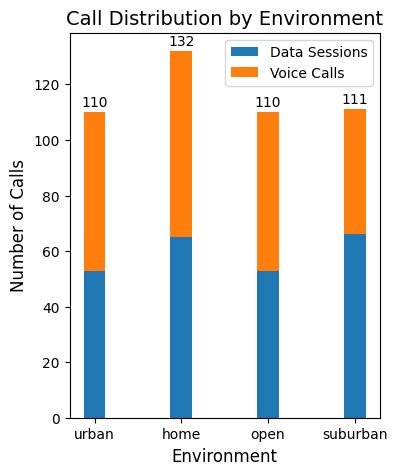

In [43]:
environments = dfc['Environment'].unique()

fig, ax = plt.subplots(figsize=(4, 5))

x = np.arange(len(environments))
bar_width = 0.25  # Width of each bar

# Plot stacked bars
p1 = ax.bar(x, calls_per_env['Data Sessions'], bar_width, label='Data Sessions')
p2 = ax.bar(x, calls_per_env['Voice Calls'], bar_width, bottom=calls_per_env['Data Sessions'], label='Voice Calls', color='#ff7f0e')


ax.set_ylabel('Number of Calls', fontsize=12)
ax.set_xlabel('Environment', fontsize=12)
ax.set_title('Call Distribution by Environment', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(environments)
ax.legend()


# Add value labels on top of bars
for i, (d, v) in enumerate(zip(calls_per_env['Data Sessions'], calls_per_env['Voice Calls'])):
    total = d + v
    ax.text(i, total + 1, str(total), ha='center', va='bottom')

plt.show()

In [44]:
#Counting calls (voices and data) per Tower

calls_per_T = (
    dfc.groupby(['Tower ID', 'Call Type'])
    .size()
    .unstack(fill_value=0)  # convert to columns
    .reset_index()
    .rename(columns={'voice': 'Voice Calls', 'data': 'Data Sessions'})
)
calls_per_T

Call Type,Tower ID,Data Sessions,Voice Calls
0,1,20,23
1,2,28,25
2,3,22,16
3,4,20,21
4,5,27,25
5,6,25,21
6,7,29,24
7,8,23,25
8,9,21,26
9,10,22,20


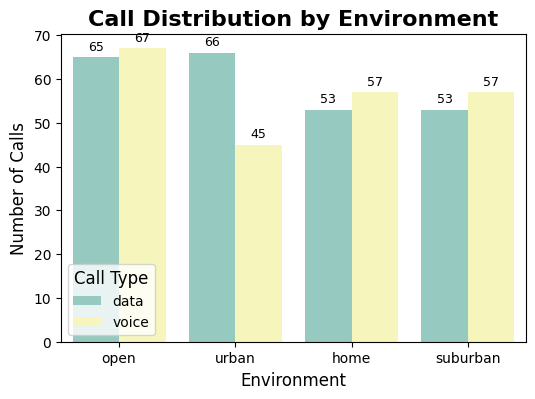

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=dfc,
    x='Environment',
    hue='Call Type',
    order=dfc['Environment'].value_counts().index,
    palette='Set3'
)

plt.title('Call Distribution by Environment', fontsize=16, fontweight='bold')

plt.xlabel('Environment', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)

plt.legend(title='Call Type', title_fontsize=12, fontsize=10)

#annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.show()


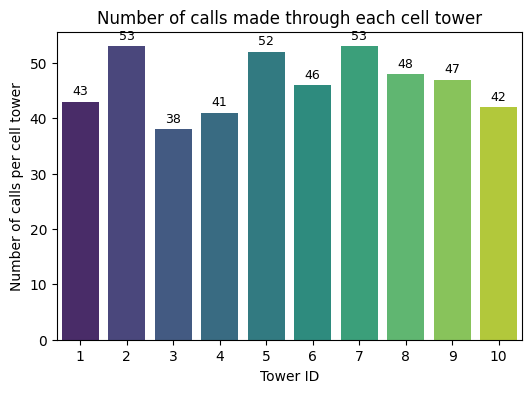

In [46]:
tower_id = (
    df
    .groupby(by="Tower ID", sort=True)
    .Timestamp
    .count()
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(y=tower_id.values, x=tower_id.index, palette="viridis")

plt.xlabel("Tower ID")
plt.ylabel("Number of calls per cell tower")
plt.title("Number of calls made through each cell tower")
#annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.show()
#refernce kaggle

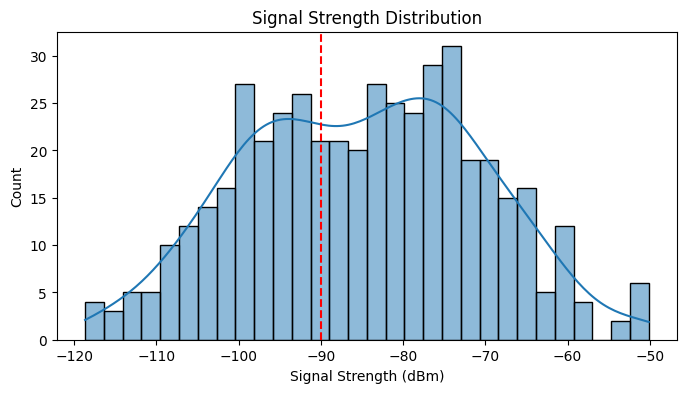

In [47]:
# Signal quality distribution - threshold is -90 db
# visualizing the probability density function
# -90 dBm is the industry-standard threshold for minimum usable signal:
    # Device sensitivity limits typically start at -90 to -100 dBm ------- below this calls starts to drop
plt.figure(figsize=(8,4))
sns.histplot(df['Signal Strength (dBm)'], bins=30, kde=True)
plt.axvline(x=-90, color='r', linestyle='--', label='Poor Signal Threshold')
plt.title('Signal Strength Distribution')

plt.show()


In [48]:
tower_stats = df.groupby('Tower ID').agg(
    avg_signal=('Signal Strength (dBm)', 'mean'),
    max_distance=('Distance to Tower (km)', 'max'),
    call_count=('User ID', 'count'),
    min_signal=('Signal Strength (dBm)', 'min'),
    max_signal=('Signal Strength (dBm)', 'max')
)
tower_stats

,avg_signal,max_distance,call_count,min_signal,max_signal
Tower ID,,,,,
1,-83.964351,9.978743,43,-115.259044,-60.507473
2,-87.410482,9.869546,53,-116.575176,-53.639041
3,-82.496603,9.727757,38,-111.403357,-51.967554
4,-90.029914,9.785869,41,-118.243982,-63.492404
5,-84.391247,9.981806,52,-117.519759,-59.435190
6,-82.928277,9.794610,46,-113.361762,-50.933754
7,-83.692368,9.595302,53,-118.681318,-50.235331
8,-83.607928,9.929280,48,-109.731555,-63.074022
9,-85.192507,9.584578,47,-113.173552,-57.155934


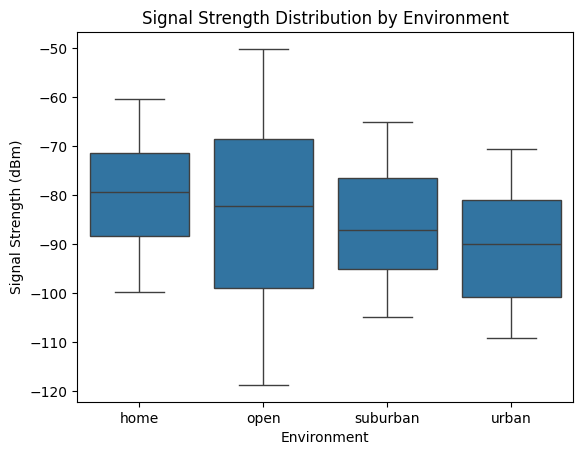

In [49]:
sns.boxplot(data=df, x='Environment', y='Signal Strength (dBm)')
plt.title('Signal Strength Distribution by Environment')
plt.show()

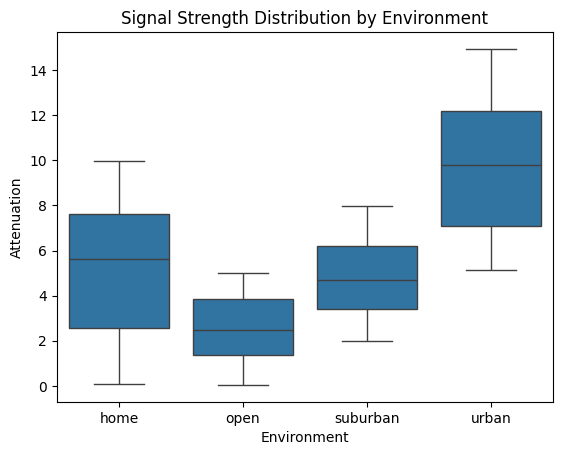

In [50]:
#Higher attenuation means Lower signal strength
#Signal strength at the receiver = transmitted signal strength minus attenuation

sns.boxplot(data=df, x='Environment', y='Attenuation')
plt.title('Signal Strength Distribution by Environment')
plt.show()

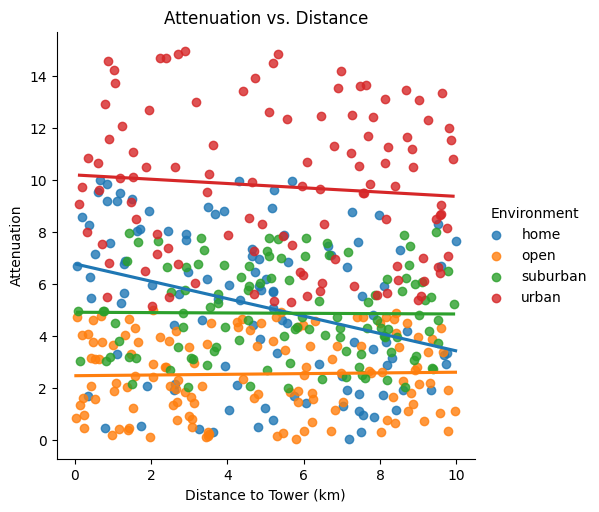

In [51]:

# attenuation vs. distance
sns.lmplot(data=dfc, x="Distance to Tower (km)", y="Attenuation",
           hue="Environment", ci=None)
plt.title("Attenuation vs. Distance")
plt.show()

# we notice attenuation in urban environemtn is the highest

<Axes: xlabel='Environment', ylabel='Attenuation'>

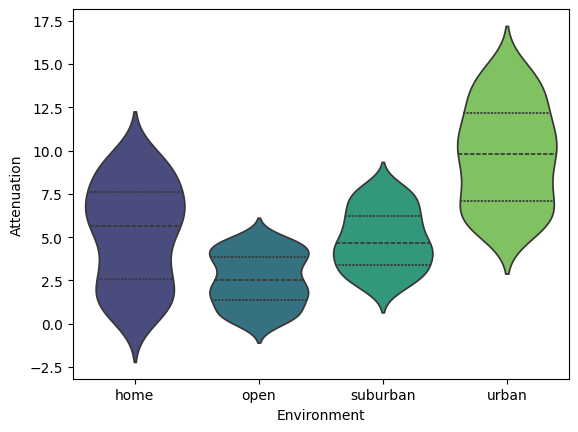

In [52]:
sns.violinplot(data=df, x="Environment", y="Attenuation",
               inner="quartile", palette="viridis")

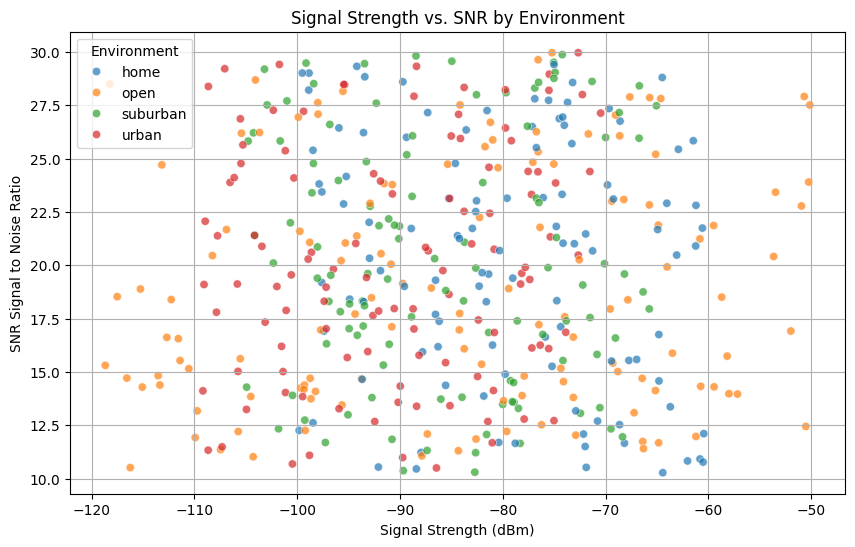

In [53]:
#viulizing signal strength vs the ration of the signal/noise for each environment
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfc, x='Signal Strength (dBm)', y='SNR', hue='Environment', alpha=0.7)
plt.title('Signal Strength vs. SNR by Environment')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('SNR Signal to Noise Ratio')
plt.grid(True)
plt.show()


In [54]:
corrl = dfc[['Signal Strength (dBm)', 'SNR']].corr()
print("Correlation between Signal Strength and SNR Signal to Noise Ratio:\n", corrl)


Correlation between Signal Strength and SNR Signal to Noise Ratio:
                        Signal Strength (dBm)       SNR
Signal Strength (dBm)               1.000000  0.021907
SNR                                 0.021907  1.000000


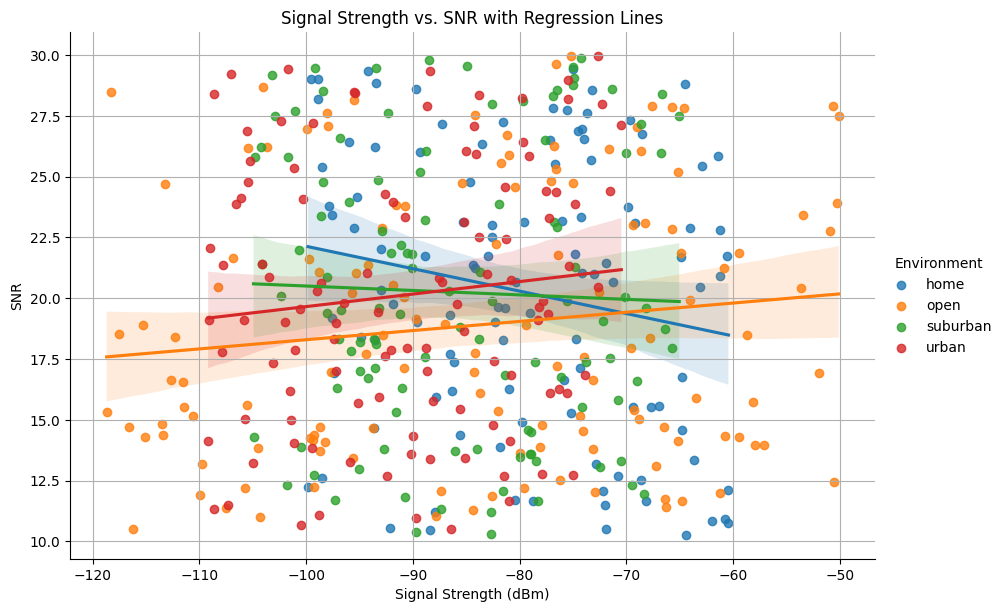

In [55]:
sns.lmplot(data=dfc, x='Signal Strength (dBm)', y='SNR', hue='Environment', height=6, aspect=1.5)
plt.title('Signal Strength vs. SNR with Regression Lines')
plt.grid(True)
plt.show()


In [56]:
#Let's take a look at the "User ID" and "Tower ID" columns - this can be quite useful further down the line
print(f'This data set has {df["User ID"].nunique()} unique user IDs, and {df["Tower ID"].nunique()} unique tower IDs')
#kaggle refrence

This data set has 99 unique user IDs, and 10 unique tower IDs


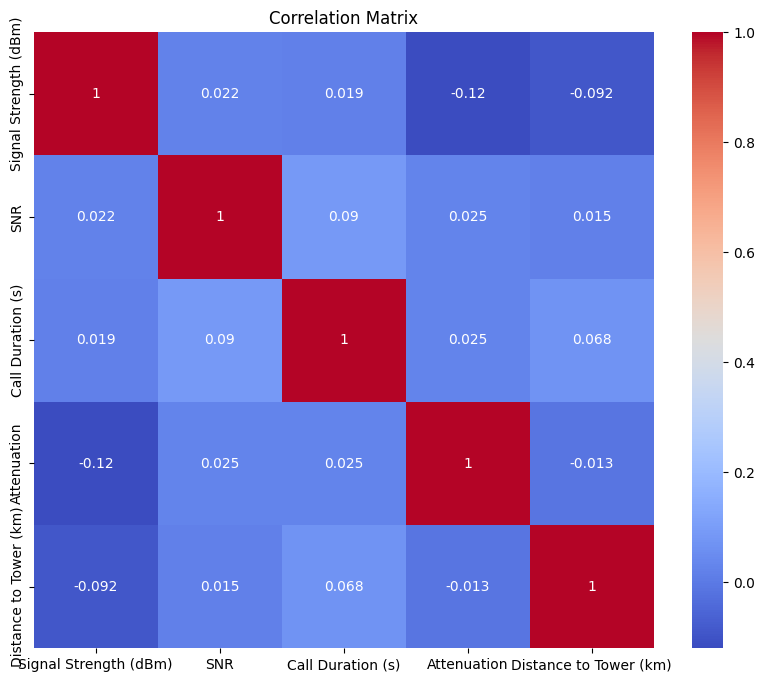

In [57]:
dfc_numeric = dfc.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(dfc_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Signal loss per km: -0.45 dBm/km
Signal loss per dB attenuation: -0.50 dBm


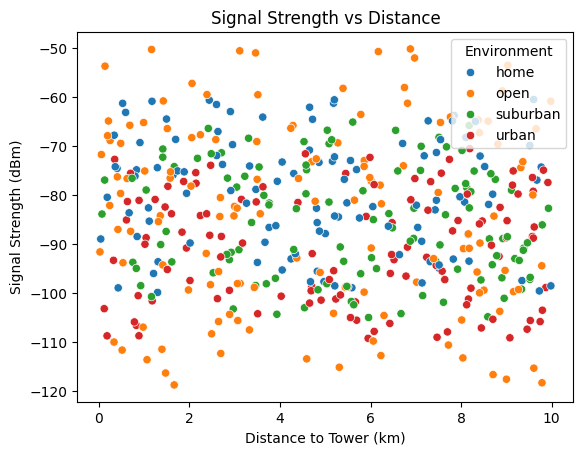

In [58]:
# Regression analysis
from sklearn.linear_model import LinearRegression

X = dfc[['Distance to Tower (km)', 'Attenuation']]
y = dfc['Signal Strength (dBm)']
model = LinearRegression().fit(X, y)

print(f"Signal loss per km: {model.coef_[0]:.2f} dBm/km")
print(f"Signal loss per dB attenuation: {model.coef_[1]:.2f} dBm")

# Predictive visualization
sns.scatterplot(x='Distance to Tower (km)', y='Signal Strength (dBm)',
                hue='Environment', data=df)
plt.title('Signal Strength vs Distance')
plt.show()

In [59]:
#Let's see how many calls are made within each of the environments listed in the data set
#the same as users counts
environment = dfc.groupby(by="Environment", sort=True).size()
environment = environment.sort_values(ascending=True)

print(environment)

Environment
home        110
suburban    110
urban       111
open        132
dtype: int64


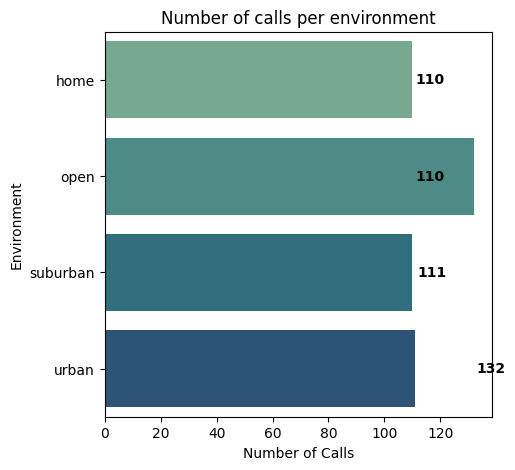

In [60]:
# the number of calls made within each environment.
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=environment.values, y=environment.index, palette="crest")

plt.xlabel("Number of Calls")
plt.ylabel("Environment")
plt.title("Number of calls per environment")

# Add annotations at the end of bars
for index, value in enumerate(environment.values):
    ax.text(value + 1, index, str(value), va="center", fontsize=10, fontweight="bold", color="black")

plt.show()
#kaggle refrence

In [61]:
dfc['Timestamp'] = pd.to_datetime(dfc['Timestamp'])

In [63]:
#pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
#pumpkins['Month names'] = pd.DatetimeIndex(pumpkins['Date']).month_name()
#groupped = pumpkins.groupby(['Month'], as_index=False)['High Price'].mean()
#plt.plot(groupped['Month'], groupped['High Price'])

Based on the description of data the distance to towers range from 5 km to 10 km which is in general either inside the cell or on the edge according to telecom industry standards:

<1 km: Near-field (strongest signal, potential interference)

1-3 km: Optimal coverage zone

3-6 km: Standard coverage

6-10 km: Edge of typical cell range

10 km: Extended/fringe coverage

In [64]:
dfc['Distance Band'] = pd.cut(
    dfc['Distance to Tower (km)'],
    bins=[0, 1, 3, 6, 10, np.inf],
    labels=['very close', 'close', 'mid', 'far', 'very far']
)
dfc.head()

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing,Env_Std,Location_Type,Is_Duplicate,Distance Band
0,2022-01-03 17:46:13,-84.119763,25.940082,1713.800550,urban,14.690438,2.243176,5,25,data,incoming,urban,outdoor,False,close
1,2022-01-04 17:29:31,-87.806131,15.937354,345.371848,home,6.213698,5.002566,3,22,voice,incoming,indoor,indoor,False,mid
2,2022-01-05 17:14:01,-116.575176,14.709384,259.285043,open,4.494415,8.705974,2,5,voice,incoming,rural,outdoor,False,far
3,2022-01-06 16:02:29,-82.961183,21.727165,357.974004,home,7.619957,7.427025,5,33,data,outgoing,indoor,indoor,False,far
4,2022-01-07 22:19:17,-85.012574,26.058158,398.006716,urban,10.655159,0.612071,5,8,voice,outgoing,urban,outdoor,False,very close


**PROPAGATION MODEL**

In [65]:
#per users
dfc.groupby('Distance Band')['Signal Strength (dBm)'].describe()

,count,mean,std,min,25%,50%,75%,max
Distance Band,,,,,,,,
very close,50.0,-83.531162,14.855817,-111.569019,-93.728674,-81.143467,-73.030821,-53.639041
close,93.0,-83.431288,14.573061,-118.681318,-93.551338,-82.552025,-73.692772,-50.235331
mid,130.0,-85.003586,14.092817,-115.075675,-98.022033,-83.985425,-74.032286,-50.510929
far,190.0,-86.047476,14.293379,-118.243982,-95.858307,-86.583683,-76.409561,-50.122222
very far,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
dfc.groupby('Distance Band')['SNR'].describe()

,count,mean,std,min,25%,50%,75%,max
Distance Band,,,,,,,,
very close,50.0,19.888549,5.735822,10.451326,15.099952,20.439956,24.549320,28.574764
close,93.0,19.619877,5.513463,10.271411,15.305653,19.072160,24.288313,29.961827
mid,130.0,19.903022,5.692150,10.296911,14.570128,19.922551,24.725900,29.872926
far,190.0,19.877864,5.533097,10.367120,14.925353,19.557365,24.798949,29.963213
very far,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#per environemnt
pd.pivot_table(dfc, values='SNR', index='Distance Band',
               columns='Environment', aggfunc='median')

Environment,home,open,suburban,urban
Distance Band,,,,
very close,21.820014,16.556455,21.550091,19.948397
close,23.076689,17.736352,18.284554,18.966485
mid,21.128453,18.472880,19.391700,19.332568
far,19.296493,17.948587,20.070370,19.900447


**CHECKING FOR OUTLIERS**

In [68]:

# IQR method
def detect_outliers(dff, column):
    Q1 = dff[column].quantile(0.25)
    Q3 = dff[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dff[(dff[column] < lower_bound) | (dff[column] > upper_bound)]

# Detect SNR outliers
snr_outliers = detect_outliers(dfc, 'SNR')
print(f"SNR outliers ({len(snr_outliers)} records):")
print(snr_outliers[['SNR', 'Distance to Tower (km)', 'Environment', 'Tower ID']])

# Detect Distance outliers
dist_outliers = detect_outliers(dfc, 'Distance to Tower (km)')
print(f"\nDistance outliers ({len(dist_outliers)} records):")
print(dist_outliers[['Distance to Tower (km)', 'SNR', 'Environment', 'Tower ID']])

SNR outliers (0 records):
Empty DataFrame
Columns: [SNR, Distance to Tower (km), Environment, Tower ID]
Index: []

Distance outliers (0 records):
Empty DataFrame
Columns: [Distance to Tower (km), SNR, Environment, Tower ID]
Index: []


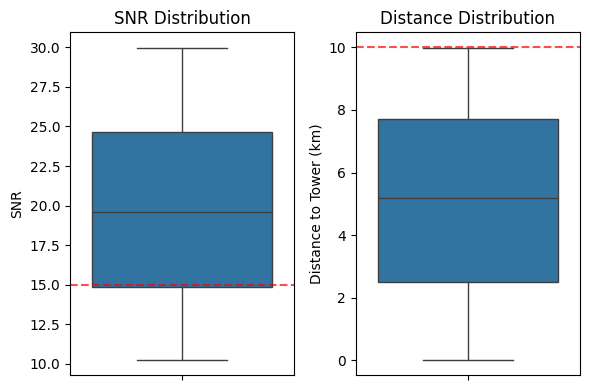

In [69]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=dfc['SNR'])
plt.title('SNR Distribution')
plt.axhline(y=15, color='r', linestyle='--', alpha=0.7)  # Poor SNR threshold, 15 is the poor limit

plt.subplot(1, 2, 2)
sns.boxplot(y=dfc['Distance to Tower (km)'])
plt.title('Distance Distribution')
plt.axhline(y=10, color='r', linestyle='--', alpha=0.7)  # Typical cell limit - cell edge usually is 10
plt.tight_layout()

In [70]:
# outliers based on telecom standards
dfc['SNR_Outlier'] = False
dfc['Distance_Outlier'] = False

#SNR outliers
dfc.loc[dfc['SNR'] < 10, 'SNR_Outlier'] = True   # Unusable connection - SNR below 10
dfc.loc[dfc['SNR'] > 40, 'SNR_Outlier'] = True   # Very high Suspiciously (sensor error)
#print(dfc[(dfc['SNR_Outlier']) | (dfc['Distance_Outlier'])])

#Distance outliers
dfc.loc[dfc['Distance to Tower (km)'] > 30, 'Distance_Outlier'] = True  # Beyond typical cell range - tower signal cannot reach it
dfc.loc[dfc['Distance to Tower (km)'] < 0.1, 'Distance_Outlier'] = True  # Suspiciously close - a person under tower !
#print("Distance Outliers")
#print(dfc[(dfc['SNR_Outlier']) | (dfc['Distance_Outlier'])])
outliers = dfc[(dfc['SNR_Outlier']) | (dfc['Distance_Outlier'])]


print(f"\nTotal Outliers: {len(outliers)}")
print(f"SNR Outliers: {len(outliers[outliers['SNR_Outlier']])}")
print(f"Distance Outliers: {len(outliers[outliers['Distance_Outlier']])}\n")

print("Outlier Details:")
print(outliers[['Environment', 'Tower ID', 'Signal Strength (dBm)',
               'SNR', 'Distance to Tower (km)',
               'SNR_Outlier', 'Distance_Outlier']].to_string(index=False))



Total Outliers: 4
SNR Outliers: 0
Distance Outliers: 4

Outlier Details:
Environment Tower ID  Signal Strength (dBm)       SNR  Distance to Tower (km)  SNR_Outlier  Distance_Outlier
       home        2             -88.904164 21.722731                0.044318        False              True
       open        4             -91.539539 23.828537                0.026375        False              True
       open        8             -71.674097 26.155241                0.058019        False              True
   suburban        1             -83.811585 18.328767                0.071112        False              True


<Axes: xlabel='Distance to Tower (km)', ylabel='SNR'>

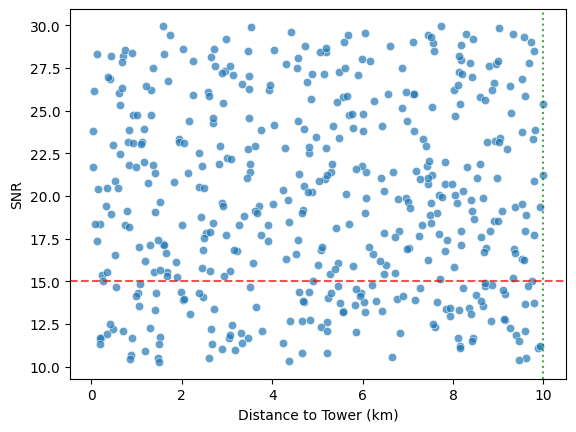

In [71]:
# Industry standard thresholds
plt.axhline(y=15, color='r', ls='--', alpha=0.7)  # poor SNR
plt.axvline(x=10, color='g', ls=':', alpha=0.7)    # Distance threshold
sns.scatterplot(x=dfc['Distance to Tower (km)'], y=dfc['SNR'], alpha=0.7)

In [72]:
from sklearn.ensemble import IsolationForest

# Prepare data
X = dfc[['SNR', 'Distance to Tower (km)']].copy()
X['SNR'] = X['SNR'].abs()  # SNR is typically positive

# Train model
iso = IsolationForest(contamination=0.05, random_state=42)
dfc['Anomaly_Score'] = iso.fit_predict(X)
dfc['ML_Outlier'] = dfc['Anomaly_Score'] == -1

In [73]:
dfc['ML_Outlier'].value_counts()

,count
ML_Outlier,
False,439
True,24


In [74]:
dfc['SNR_Outlier'].value_counts()

,count
SNR_Outlier,
False,463


In [75]:
dfc['Distance_Outlier'].value_counts()

,count
Distance_Outlier,
False,459
True,4


In [76]:
dfc['Total_Outlier'] = dfc['ML_Outlier'] | dfc['SNR_Outlier'] | dfc['Distance_Outlier']

In [77]:
dfc['Total_Outlier'].value_counts()

,count
Total_Outlier,
False,436
True,27


In [78]:
dfc[dfc['Total_Outlier'] == True]

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing,Env_Std,Location_Type,Is_Duplicate,Distance Band,SNR_Outlier,Distance_Outlier,Anomaly_Score,ML_Outlier,Total_Outlier
28,2022-01-31 09:46:42,-118.243982,28.492087,879.047500,open,0.347463,9.785869,4,83,voice,outgoing,rural,outdoor,False,far,False,False,-1,True,True
39,2022-02-11 20:10:56,-88.904164,21.722731,848.765422,home,6.688075,0.044318,2,22,data,outgoing,indoor,indoor,False,very close,False,True,1,False,True
44,2022-02-16 21:47:35,-88.393745,29.325768,1029.850345,urban,6.445712,9.574520,10,59,data,outgoing,urban,outdoor,False,far,False,False,-1,True,True
70,2022-03-14 18:43:36,-91.539539,23.828537,940.724934,open,0.871065,0.026375,4,72,data,incoming,rural,outdoor,False,very close,False,True,1,False,True
115,2022-04-28 16:56:21,-72.656677,29.963213,1137.433993,urban,9.835979,7.742375,4,75,data,outgoing,urban,outdoor,False,far,False,False,-1,True,True
131,2022-05-14 14:17:55,-76.881604,28.306054,1558.656032,suburban,3.062224,0.130566,4,99,voice,incoming,suburban,outdoor,False,very close,False,False,-1,True,True
134,2022-05-17 20:45:25,-98.806246,11.089071,690.519286,urban,11.534570,9.869546,2,87,voice,incoming,urban,outdoor,False,far,False,False,-1,True,True
146,2022-05-29 23:08:39,-64.828293,11.675815,400.479578,open,1.621028,0.214151,9,62,voice,incoming,rural,outdoor,False,very close,False,False,-1,True,True
165,2022-06-17 11:42:00,-82.718810,10.296911,1117.031857,suburban,6.258503,4.362614,8,86,data,incoming,suburban,outdoor,False,mid,False,False,-1,True,True
190,2022-07-12 09:37:06,-82.639175,11.209922,1770.086274,suburban,5.254657,9.929280,8,6,voice,outgoing,suburban,outdoor,False,far,False,False,-1,True,True


# **Signal Strength: Affected by:**

Distance

Attenuation

Transmit power

# **SNR: Affected by:**

Signal Strength

Noise Sources (independent of signal):

Interference

Thermal noise

Electronic noise

# **OUR Target is SNR:: SNR FOCUSED ANALYSIS**

**Telecom signal follows log decay laws**

Accordning to telecom standards relationship between SNR and other features is not linear, hence we use time series just to show trends.
Thus, we could use polynomial regression or random forest to capture non linearity

image.png

image.png

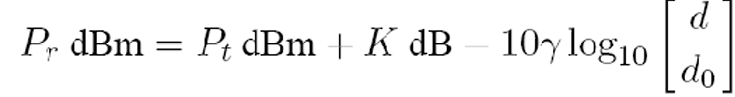

One of the most important formula is FRIIS formula, which relates power transmitted and received to wavelength and distance

A is attenuation
P noise assumed to be 1

reference:
https://awjunaid.com/electronics/understanding-signal-to-noise-ratio-snr-key-to-optimizing-communication-systems/

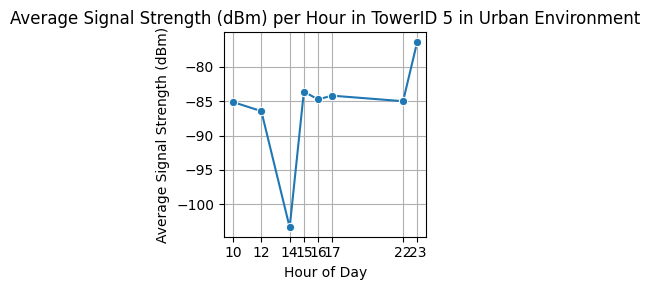

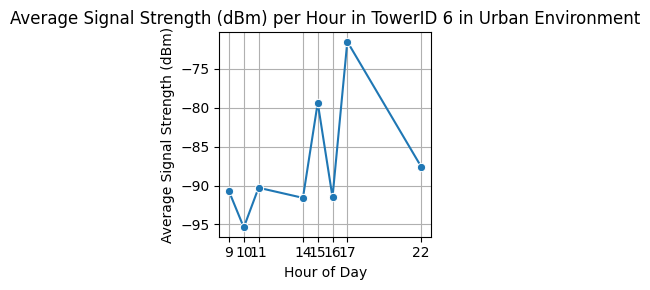

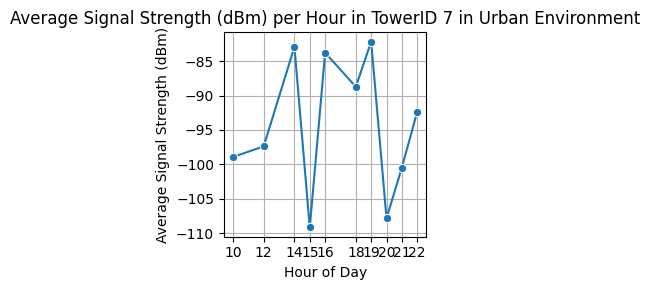

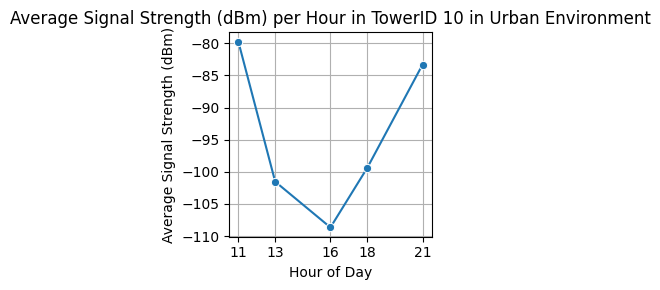

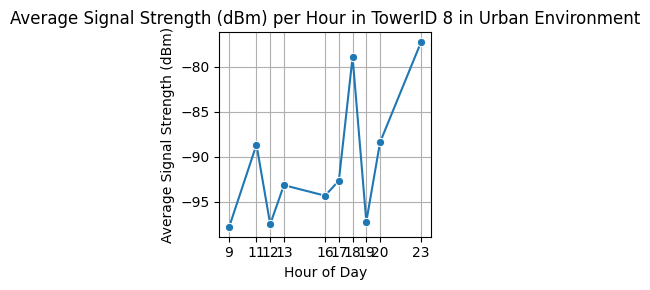

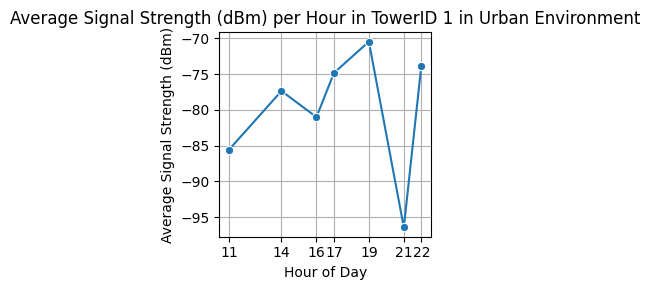

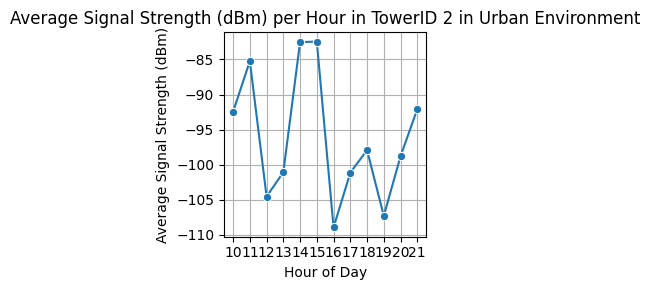

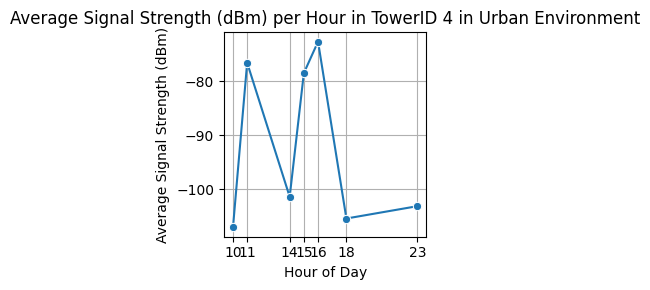

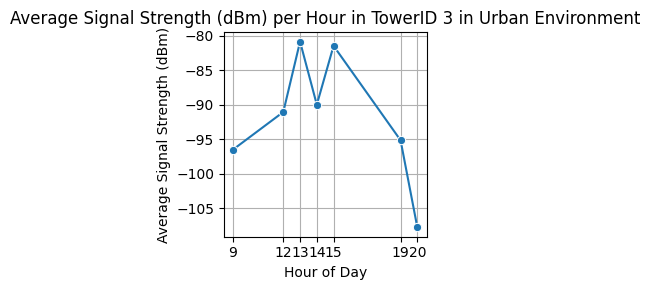

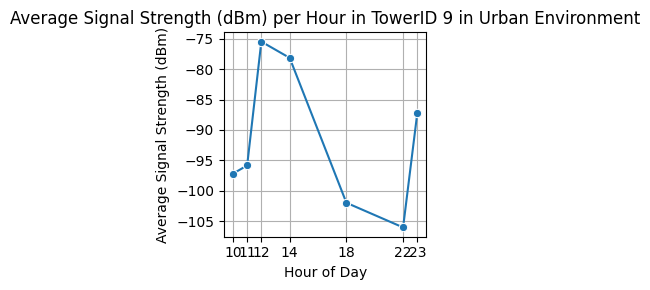

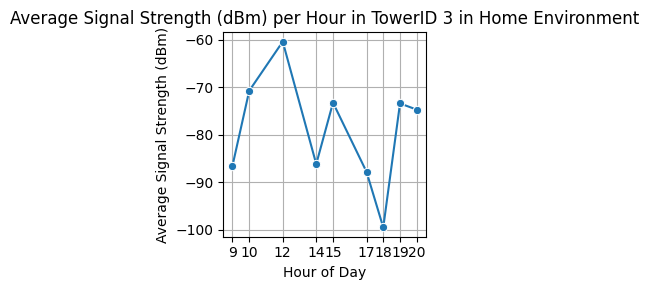

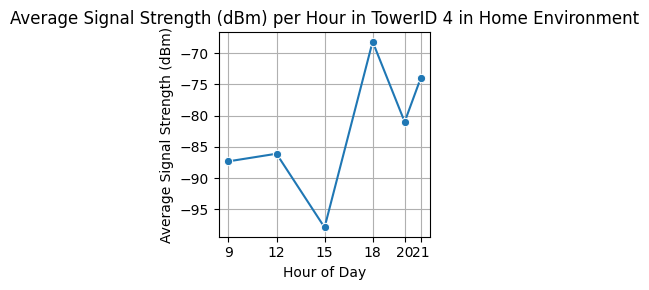

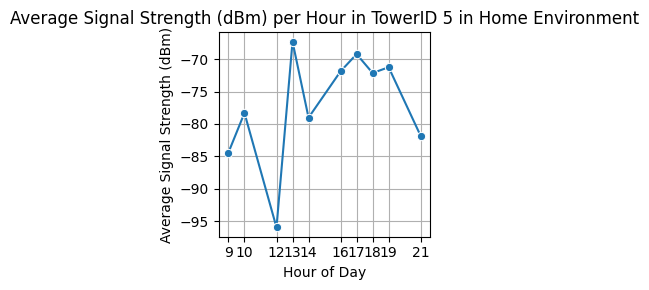

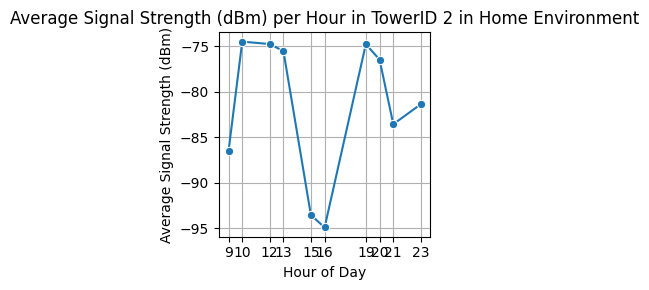

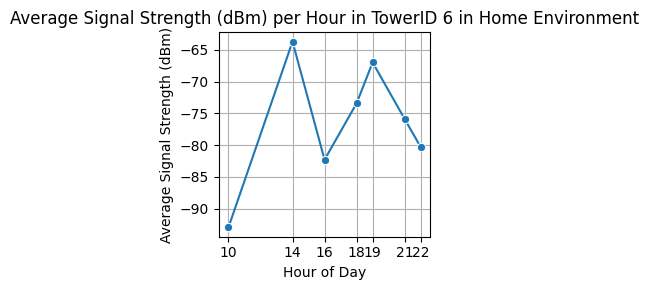

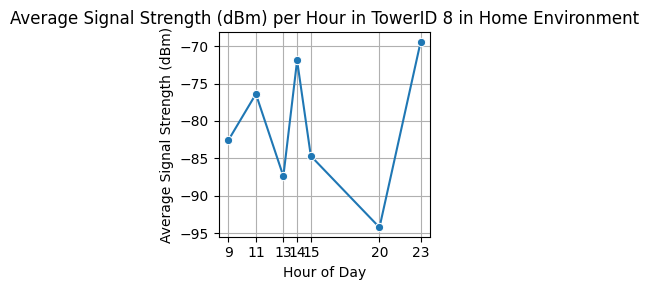

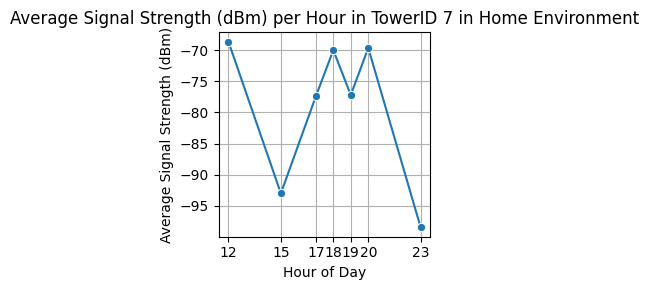

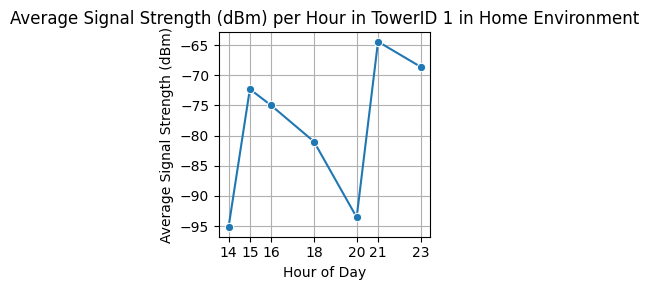

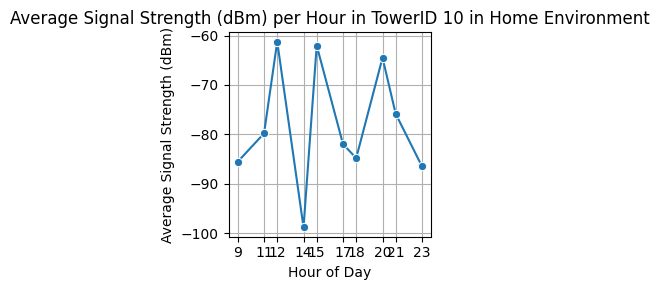

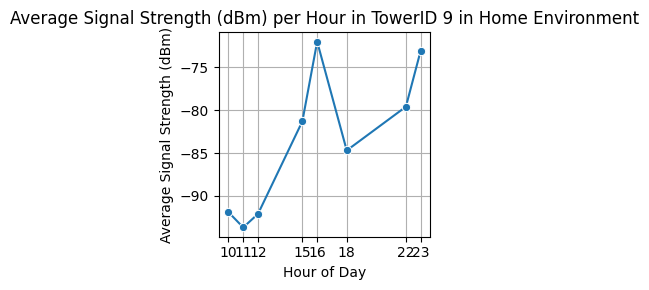

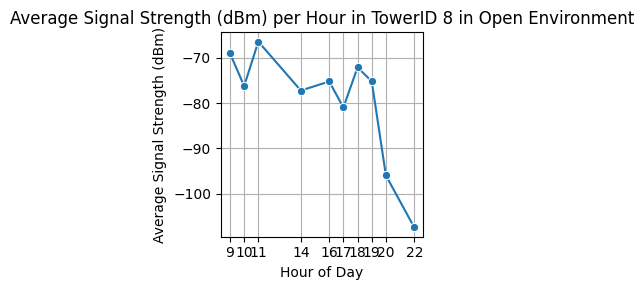

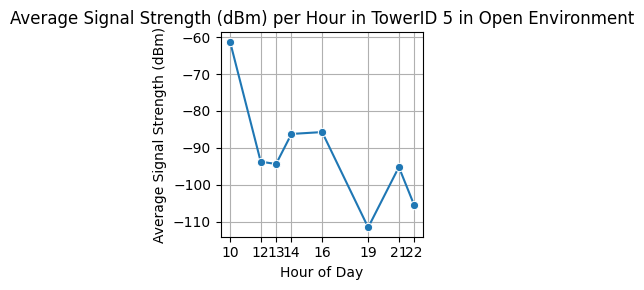

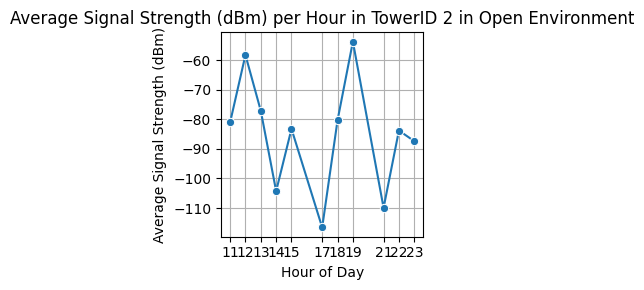

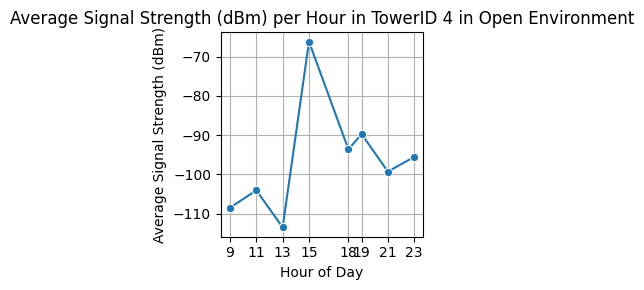

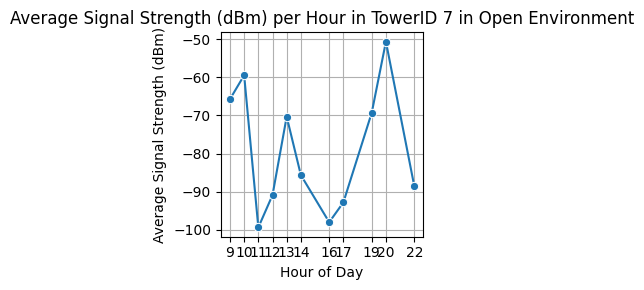

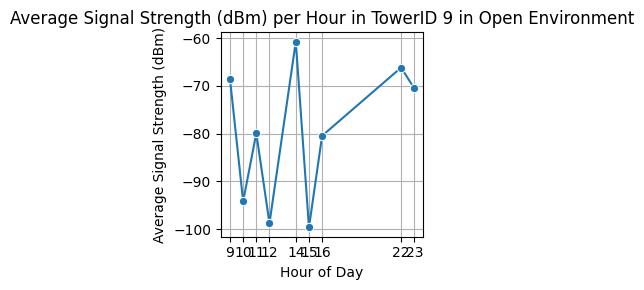

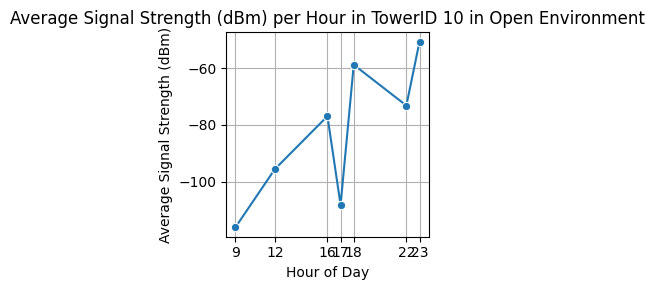

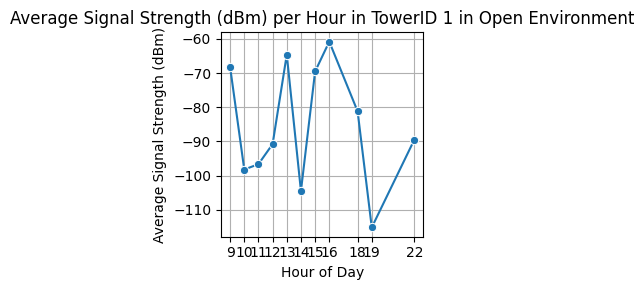

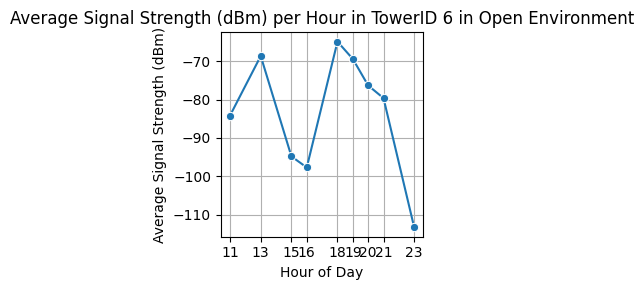

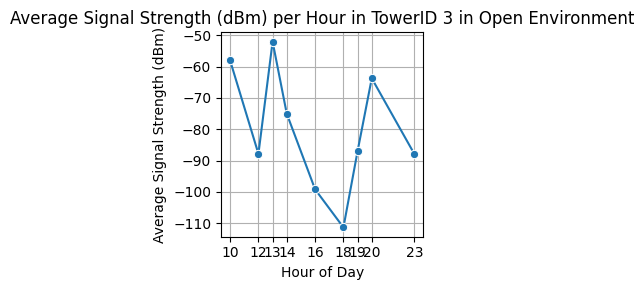

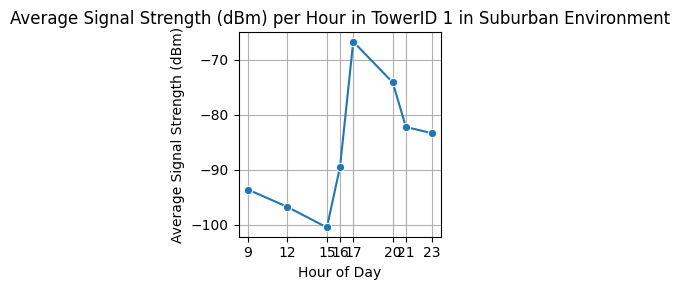

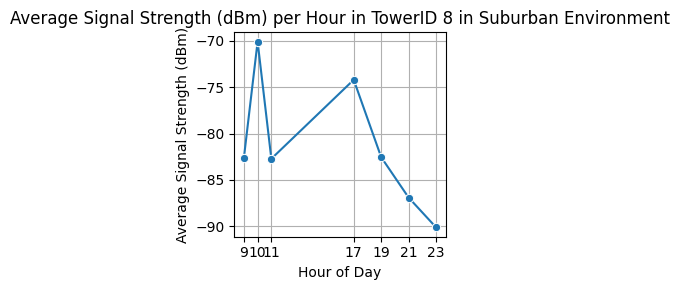

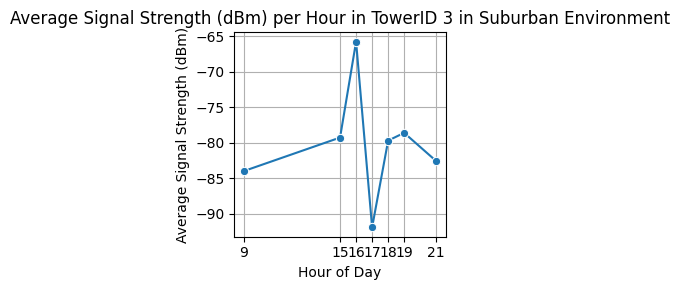

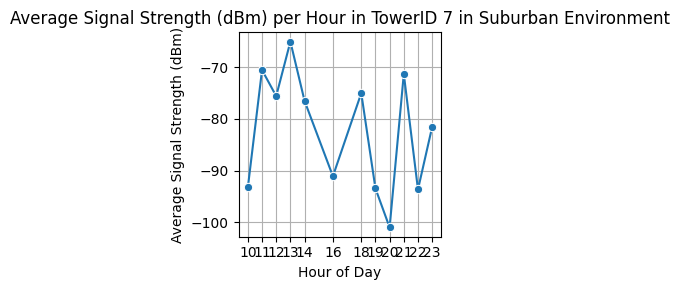

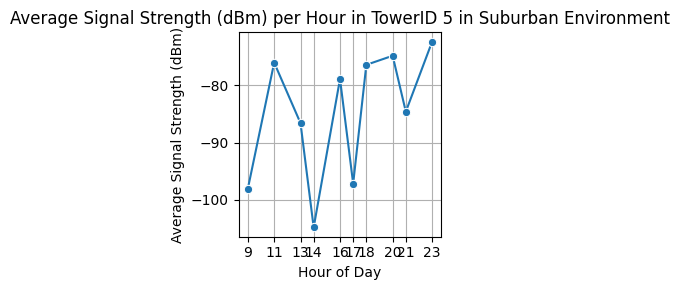

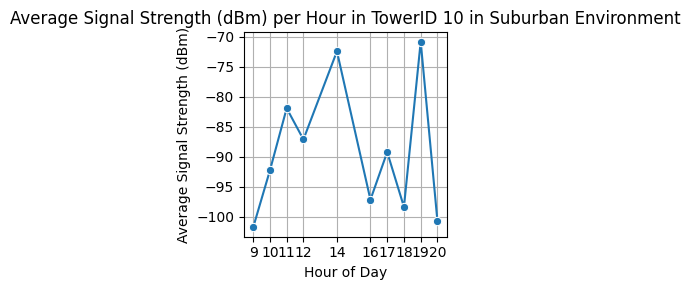

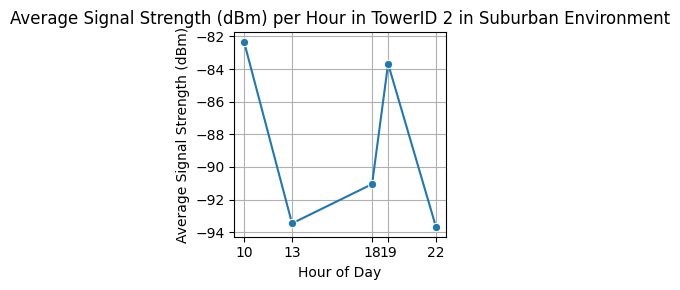

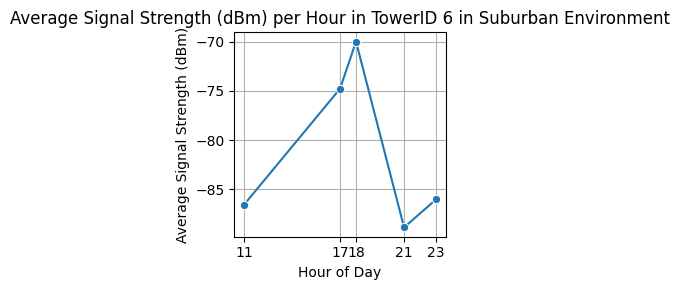

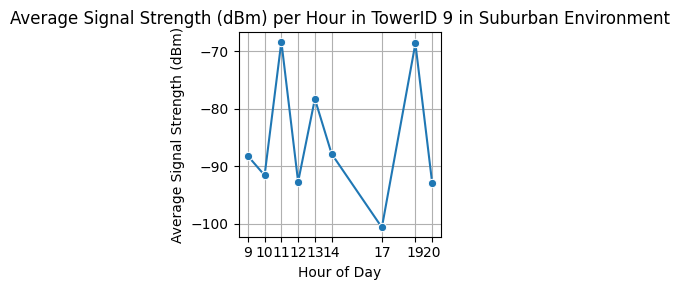

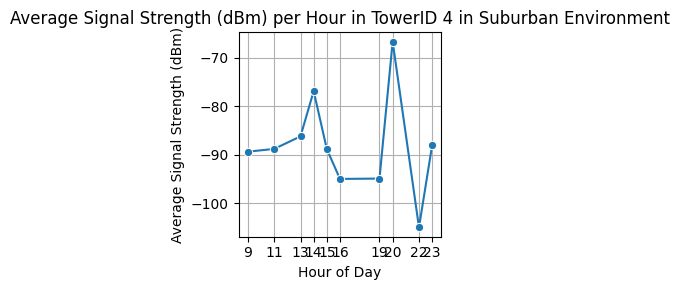

In [79]:

environments = dfc['Environment'].unique()
dfc.sort_values('Timestamp', inplace=True)

for env in environments:

    df_env = dfc[dfc['Environment'] == env]


    towers_in_env = df_env['Tower ID'].unique()

    for tower_id in towers_in_env:
        # Filter data for this specific tower-environment combination
        df_tower = df_env[df_env['Tower ID'] == tower_id].copy()
        if not df_tower.empty:
          df_tower = df_tower.reset_index()
          df_tower['Timestamp'] = pd.to_datetime(df_tower['Timestamp'])
          df_tower['Hour'] = df_tower['Timestamp'].dt.hour
          hourly_avg = df_tower.groupby('Hour')['Signal Strength (dBm)'].mean().reset_index()
          hourly_avg = hourly_avg.sort_values('Hour')

          plt.figure(figsize=(3, 3))
          # Plot AVG Signal Strength (dBm) over time for the selected tower in its environment

          sns.lineplot(data=hourly_avg, x='Hour', y='Signal Strength (dBm)', marker='o')
          plt.title(f'Average Signal Strength (dBm) per Hour in TowerID {str(tower_id)} in {env.capitalize()} Environment')

          plt.xlabel('Hour of Day')
          plt.ylabel('Average Signal Strength (dBm)')
          plt.xticks(hourly_avg['Hour'])
          plt.grid(True)
          plt.tight_layout()
          plt.show()
        else:
          # Optional: print a message if a combination is skipped
          print(f"Skipping plot for Tower {tower_id} in {env} as no data is available.")

In [80]:
'''# Loop over the 4 environments to analyze
selected_environment = dfc['Environment'].unique()
selected_tower = dfc['Tower ID'].unique()
dfc.sort_values('Timestamp', inplace=True)
print(selected_environment)
print(selected_tower)

for i in selected_environment:
  # Filter data for the selected environment
  df_env = dfc[dfc['Environment'] == i].copy()

  for j in selected_tower:
    df_t = df_env[df_env['Tower ID'] == j].copy()
# Extract the hour from the timestamp
    df_t['Hour'] = df_t['Timestamp'].dt.hour
    #print(df_env['Timestamp'])
# Calculate the mean Signal Strength (dBm for each hour
    hourly_snr = df_t.groupby('Hour')['Signal Strength (dBm)'].mean().reset_index()
    hourly_snr = hourly_snr.sort_values('Hour')

# Plot Signal Strength (dBm) over time for the selected environment
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=hourly_snr, x='Hour', y='Signal Strength (dBm)', marker='o')
    plt.title(f'Average Signal Strength (dBm) per Hour in TowerID {str(j)} in {i.capitalize()} Environment')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Signal Strength (dBm)')

    plt.xticks(hourly_snr['Hour'])
    plt.grid(True)
    plt.show()'''

"# Loop over the 4 environments to analyze\nselected_environment = dfc['Environment'].unique()\nselected_tower = dfc['Tower ID'].unique()\ndfc.sort_values('Timestamp', inplace=True)\nprint(selected_environment)\nprint(selected_tower)\n\nfor i in selected_environment:\n  # Filter data for the selected environment\n  df_env = dfc[dfc['Environment'] == i].copy()\n\n  for j in selected_tower:\n    df_t = df_env[df_env['Tower ID'] == j].copy()\n# Extract the hour from the timestamp\n    df_t['Hour'] = df_t['Timestamp'].dt.hour\n    #print(df_env['Timestamp'])\n# Calculate the mean Signal Strength (dBm for each hour\n    hourly_snr = df_t.groupby('Hour')['Signal Strength (dBm)'].mean().reset_index()\n    hourly_snr = hourly_snr.sort_values('Hour')\n\n# Plot Signal Strength (dBm) over time for the selected environment\n    plt.figure(figsize=(6, 4))\n    sns.lineplot(data=hourly_snr, x='Hour', y='Signal Strength (dBm)', marker='o')\n    plt.title(f'Average Signal Strength (dBm) per Hour in To

Cellular signals typically range from -50 dBm (excellent signal) to -110 dBm (poor signal).
These values indicate the received power level from the cell tower at the device.

refrence:
https://www.onesdr.com/why-are-signal-strength-numbers-negative/#:~:text=Wi-Fi%20signal%20strengths%20are%20often%20measured%20in%20the,dBm%20(excellent%20signal)%20to%20-110%20dBm%20(poor%20signal).

In [81]:
#dfc['Timestamp'] = pd.to_datetime(dfc['Timestamp'])
#dfc = dfc.set_index('Timestamp').sort_index()

dfc['Signal_Quality'] = pd.cut(dfc['SNR'],
                              bins=[-float('inf'), -90, -80, -70, -60, float('inf')],
                              labels=['Disconnected', 'Poor', 'Fair', 'Good', 'Excellent'])

SIGNAL STRENGTH FROM DESCRIBE FUNCTION:

 - min	-118.681318
 - max	-50.122222

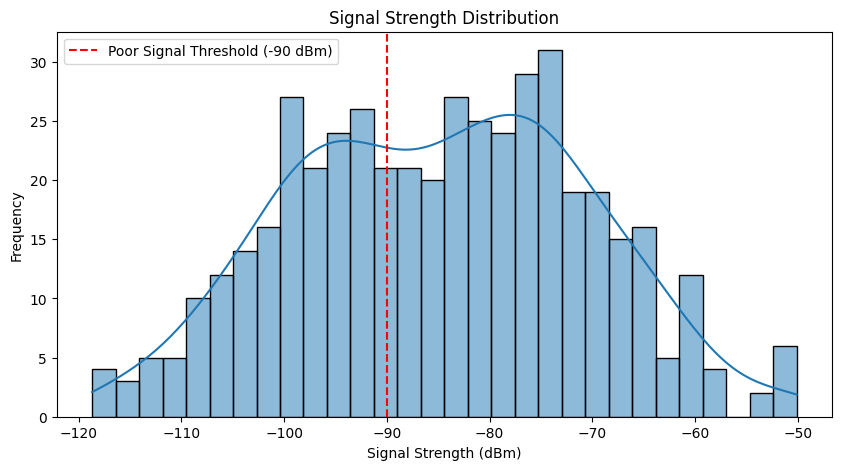

In [82]:
plt.figure(figsize=(10, 5))
sns.histplot(dfc['Signal Strength (dBm)'], bins=30, kde=True)
plt.axvline(x=-90, color='r', linestyle='--', label='Poor Signal Threshold (-90 dBm)')
plt.title('Signal Strength Distribution')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()




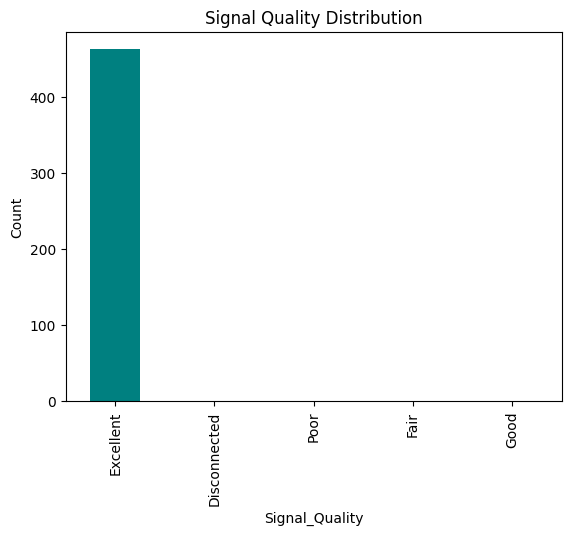

In [83]:
quality_counts = dfc['Signal_Quality'].value_counts()
quality_counts.plot(kind='bar', color='teal')
plt.title('Signal Quality Distribution')
plt.ylabel('Count')
plt.show()

In [84]:
from scipy import stats


dfc['SNR_zscore'] = stats.zscore(dfc['SNR'])

# Flag outliers (|z| > 3) - statistical rule
dfc['SNR_outlier'] = abs(dfc['SNR_zscore']) > 3

In [85]:
dfc['SNR_outlier'].value_counts()

,count
SNR_outlier,
False,463


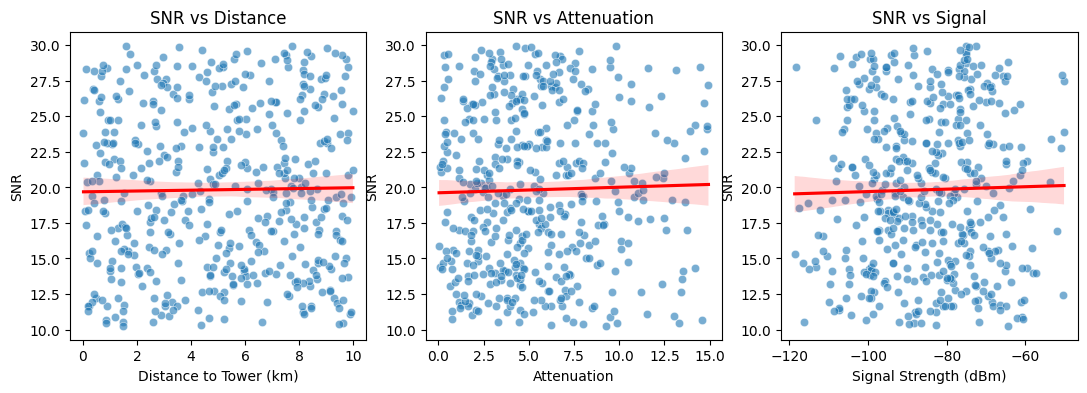

In [86]:
#plt.scatter(dfc['SNR'], dfc['Signal Strength (dBm)'])
#plt.xlabel('Signal Strength (dBm)')
#plt.ylabel('SNR')
#plt.show()

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

xs = ['Distance to Tower (km)', 'Attenuation', 'Signal Strength (dBm)']
for ax, xi in zip(axes, xs):
    sns.scatterplot(data=dfc, x=xi, y='SNR', ax=ax, alpha=0.6)
    sns.regplot(data=dfc, x=xi, y='SNR', ax=ax, scatter=False, color='red')
    ax.set_title(f'SNR vs {xi.split(" ")[0]}')
    #print(xi)
  #  print(xi[0])
   # print(xi.split(" ")[0])
    #print(xi.split(" ")[0][0])


plt.show()

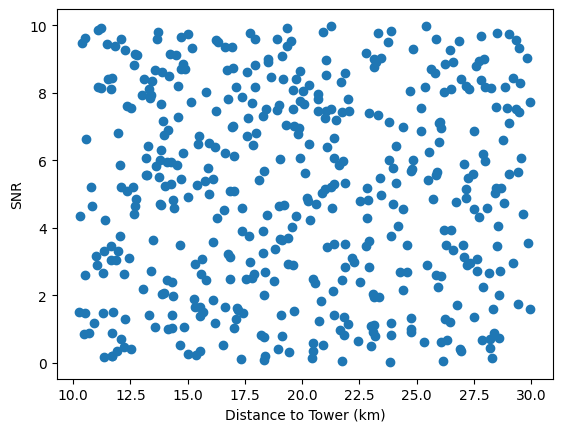

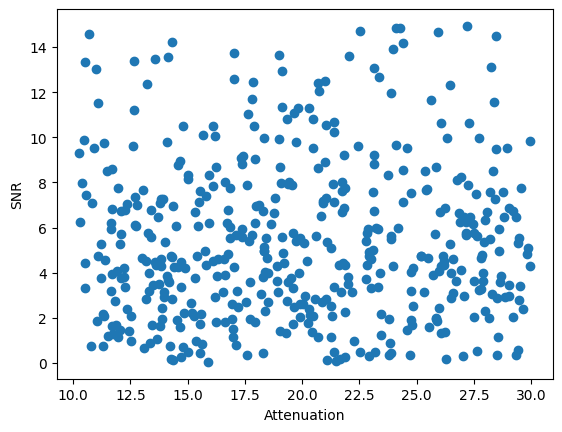

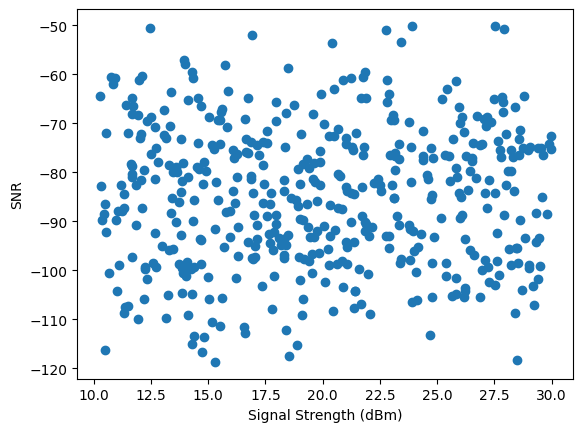

In [87]:
#the scatter plot is a very useful plot to show the relationship between two numerical variables
#it basically creates a dot for each data point, enabling you find correlations
plt.scatter(dfc['SNR'], dfc['Distance to Tower (km)'])
plt.xlabel('Distance to Tower (km)')
plt.ylabel('SNR')
plt.show()
plt.scatter(dfc['SNR'], dfc['Attenuation'])
plt.xlabel('Attenuation')
plt.ylabel('SNR')
plt.show()
plt.scatter(dfc['SNR'], dfc['Signal Strength (dBm)'])
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('SNR')
plt.show()

In [88]:
dfc['Log Distance'] = np.log1p(dfc['Distance to Tower (km)'])

In [110]:
dfc['Log SNR'] = np.log1p(dfc['SNR'])

Pmodel is a physics-based model that predicts how much a radio signal weakens as it travels through open space. The formula:

Pmodel (dB) = 20*log₁₀(distance) + 20*log₁₀(frequency) - 147.55

Where:

distance: Distance between transmitter and receiver (meters)

frequency: Radio signal frequency (Hz)

147.55: Constant derived from speed of light and mathematics
20 * log₁₀(4π/c) = 147.55
This model assumes:

No obstacles between devices

No interference

Ideal propagation conditions

In [111]:
# Free Space Path Loss model

def Pmodel(distance, frequency=2.4e9):
    """Calculate path loss in dB"""
    return 20*np.log10(distance) + 20*np.log10(frequency) - 147.55

dfc['Predicted Path Loss'] = Pmodel(dfc['Distance to Tower (km)'])
dfc['Path Loss Error'] = dfc['Attenuation'] - dfc['Predicted Path Loss']

# Use as new feature
X = dfc[['Signal Strength (dBm)', 'Log Distance', 'Path Loss Error']]
#X = dfc[['Signal Strength (dBm)', 'Log Distance', 'Attenuation']]
y = dfc['Log SNR']

In [113]:
#another attempt
# Set frequency (in MHz) — based on actual telecom band
frequency_mhz = 1800

dfc['Estimated Path Loss (FSPL)'] = 20 * np.log10(dfc['Distance to Tower (km)'] + 1e-3) + \
                                    20 * np.log10(frequency_mhz) + 32.44

# Optional: Estimated Received Power (Rx power) in dBm

# Transmit power in dBm (typical for base station)
dfc['Estimated Power (Rx)'] = dfc['Estimated Path Loss (FSPL)'] - dfc['Attenuation']
X = dfc[['Signal Strength (dBm)', 'Distance to Tower (km)', 'Estimated Power (Rx)']]
#X = dfc[['Signal Strength (dBm)', 'Log Distance', 'Attenuation']]
y = dfc['SNR']

**Reasons for chosing this model:**
Polynomial + Ridge captures nonlinear behavior without overfitting.
But it ignores time and assumes stationarity

In [114]:
#refrence
#https://stackoverflow.com/questions/69443936/sklearn-pipeline-with-standardscaler-polynomialfeatures-and-regression


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# split the data
#Splits data into 67% training and 33% testing.
#random_state=42 ensures reproducibility.
#Standard practice.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def train_polynomial_ridge_model(X, y, test_size=0.33, random_state=42,
                                degree=3, alpha=1):
  # scale the data
#StandardScaler converts features to have:
#mean = 0
#standard deviation = 1
#Scaling is essential for regression, especially when using regularization (like Ridge).
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # extract the polynomial features
  polynomial = PolynomialFeatures(degree=3, include_bias=False)
  polynomial.fit(X_train_scaled)

  X_train_model = polynomial.transform(X_train_scaled)
  X_test_model = polynomial.transform(X_test_scaled)

# fit and train the model
#Ridge Regression is a regularized linear model.
#Adds penalty to large coefficients to avoid overfitting.
#alpha=1 controls the regularization strength
  reg_model = Ridge(alpha=1)
  reg_model.fit(X_train_model, y_train)

# generate the model predictions
  y_pred_train_model = reg_model.predict(X_train_model)
  print(y_pred_train_model[:5])

  y_pred_test_model = reg_model.predict(X_test_model)
  print(y_pred_test_model[:5])

# calculate the r-squared
# determine the proportion of the variance in the dependent variable
#1.0 = perfect prediction ,  0.0 = model explains no variance
  rtrain = r2_score(y_train, y_pred_train_model)
  print(f" R^2 score on Training data: {rtrain}")

#Measures model performance on the training data
# "How well does the model fit the data it was trained on?"
  runseen = r2_score(y_test, y_pred_test_model)
  print(f" R^2 score on Testing unseen data: {runseen}")
#Measures model performance on unseen data
#Answers: "How well does the model generalize to new data?"
  def calculate_metrics(y_true, y_pred, set_name):
    print(f"\n{set_name} Metrics:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred):.4f}")

  calculate_metrics(y_train, y_pred_train_model, "Training")
  calculate_metrics(y_test, y_pred_test_model, "Testing")
  print(f"\n Overfit Indicator calculation (Train-Test R² Gap): {rtrain - runseen:.4f}")

train_polynomial_ridge_model(X, y, test_size=0.33, random_state=42, degree=3, alpha=1)

[20.1047582  19.94696433 20.7365528  18.70893162 18.68541201]
[21.38109238 19.58008774 20.84090614 18.98318801 20.94417841]
 R^2 score on Training data: 0.052085407745748324
 R^2 score on Testing unseen data: -0.031002621473274816

Training Metrics:
MAE: 4.5879
MSE: 29.0071
RMSE: 5.3858
MAPE: 0.2594

Testing Metrics:
MAE: 4.9102
MSE: 32.9603
RMSE: 5.7411
MAPE: 0.2791

 Overfit Indicator calculation (Train-Test R² Gap): 0.0831


**Metric Interpretation:**

**Metric	   Ideal Value	   Interpretation**

MAE	         Closer to 0	    Average prediction error (dB)

MSE	         Closer to 0	    Squared errors (punishes outliers)

RMSE	       Closer to 0	    Error in original units (dB)

MAPE	       <10%	            Percentage error


**R SQUARE EXPLAINATION:**

Range: 0 to 1 (or 0% to 100%)


Interpretation:

0: Model explains none of the variance (worse than just predicting the mean)

0.5: Model explains 50% of variance

1: Model explains all variance (perfect fit)

R² = 1 - (SS_residual / SS_total)
Where:

SS_residual = Sum of squared errors (actual vs predicted)

SS_total = Total sum of squares (actual vs mean)

0.8-1.0: Excellent fit

0.6-0.8: Good fit

0.4-0.6: Moderate fit

<0.4: Weak fit

Tha previous model doesn ot account for environemtn or any categorical features thus we use OneHotEncoder or simple get_dummies function


In [121]:
from sklearn.preprocessing import OneHotEncoder

# Create a copy to avoid modifying original
df_encoded = dfc.copy()

# Columns to one-hot encode
categorical_cols = ['Environment', 'Location_Type']
print(categorical_cols)
# Perform one-hot encoding using pandas (simpler than sklearn for this task)
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)
feature_cols = ['Signal Strength (dBm)', 'Distance to Tower (km)', 'Attenuation', 'Path Loss Error'] + \
               [col for col in df_encoded.columns if 'Environment_' in col or 'Location_Type_' in col]

XH = df_encoded[feature_cols]
yH = df_encoded['SNR']

print(df_encoded.columns)
X_train, X_test, y_train, y_test = train_test_split(XH, yH, test_size=0.33, random_state=42)
train_polynomial_ridge_model(XH, yH, test_size=0.33, random_state=42, degree=3, alpha=1)

['Environment', 'Location_Type']
Index(['Timestamp', 'Signal Strength (dBm)', 'SNR', 'Call Duration (s)',
       'Attenuation', 'Distance to Tower (km)', 'Tower ID', 'User ID',
       'Call Type', 'Incoming/Outgoing', 'Env_Std', 'Is_Duplicate',
       'Distance Band', 'SNR_Outlier', 'Distance_Outlier', 'Anomaly_Score',
       'ML_Outlier', 'Total_Outlier', 'Signal_Quality', 'SNR_zscore',
       'SNR_outlier', 'Log Distance', 'Predicted Path Loss', 'Path Loss Error',
       'Estimated Path Loss (FSPL)', 'Estimated Power (Rx)', 'Log SNR',
       'Environment_home', 'Environment_open', 'Environment_suburban',
       'Environment_urban', 'Location_Type_indoor', 'Location_Type_outdoor'],
      dtype='object')
[19.56188337 21.66101056 19.31358446 19.3067166  21.51117314]
[17.18517647 21.88530432 20.07017424 23.98243164 18.37323962]
 R^2 score on Training data: 0.2536243100877632
 R^2 score on Testing unseen data: -0.3483109680646206

Training Metrics:
MAE: 3.9648
MSE: 22.8398
RMSE: 4.7791
MA

**RANDOM FOREST**
Ensemble learning

non-parametric algorithm and an ensemble method built on decision trees,

"
Bagging
It uses replacement to build a distinct training subset from sample training data, and majority voting determines the final result. A good exmaple of this is a Random Forest.
"
Reference:
https://medium.com/@sumbatilinda/random-forests-regression-by-example-1baa062506f5

Random Forest Regressor Performance:
  Mean Squared Error (MSE): 34.3211
  Root Mean Squared Error (RMSE): 5.8584
  R-squared (R2): -0.1168

Feature Importances:
Signal Strength (dBm)     0.385069
Estimated Power (Rx)      0.307484
Distance to Tower (km)    0.307447
dtype: float64


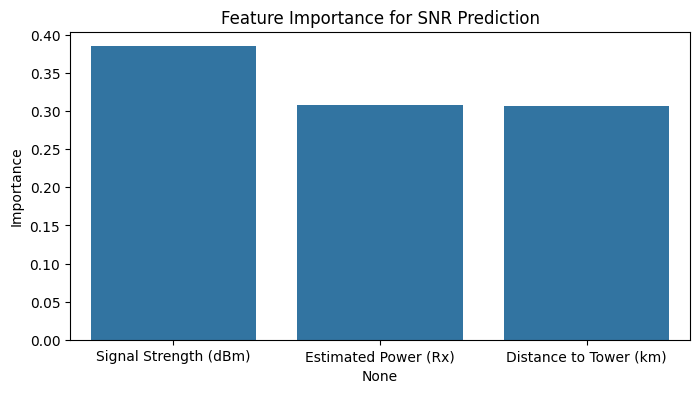

Out-of-Bag Score: -0.1055287861159464
Mean Squared Error: 34.32114237397708
R-squared: -0.1167687631920935


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
#X = dfc[['Signal Strength (dBm)', 'Log Distance', 'Attenuation']].copy()
#y = dfc['SNR']

# Split the data into training and testing sets
# standardize features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
X_scaled = scaler.fit_transform(X.values)

# Train test split
#random state 6?
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    oob_score=True,
    n_jobs=-1
) # n_jobs=-1 uses all available cores - cpu cores & 42 reproducibility & max depth of trees - fear of overfitting
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")

# You can also look at feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importance = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(sorted_importance)

# Visualize feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=sorted_importance.index, y=sorted_importance.values)
plt.title('Feature Importance for SNR Prediction')
plt.ylabel('Importance')
plt.show()

'''Refrence GeeksforGeeks
OOB_score is a performance metric for ensemble models such as random forests.
 It is calculated using the samples that are not used in the training of the model,
  which is called out-of-bag samples. The OOB score is the number of correctly predicted data
  on OOB samples taken for validation. It is used as the error of the particular bottom models
   and depending upon this, the model’s performance is enhanced'''
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = rf_model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

In [117]:
results = {
    'Random Forest': {
        'model': rf_model,
        'y_pred': y_pred, # Storing predictions might be useful later
        'metrics': {'MSE': mse, 'RMSE': rmse, 'R2': r2, 'OOB_score': oob_score}
    }
    # You can add other models here later
}

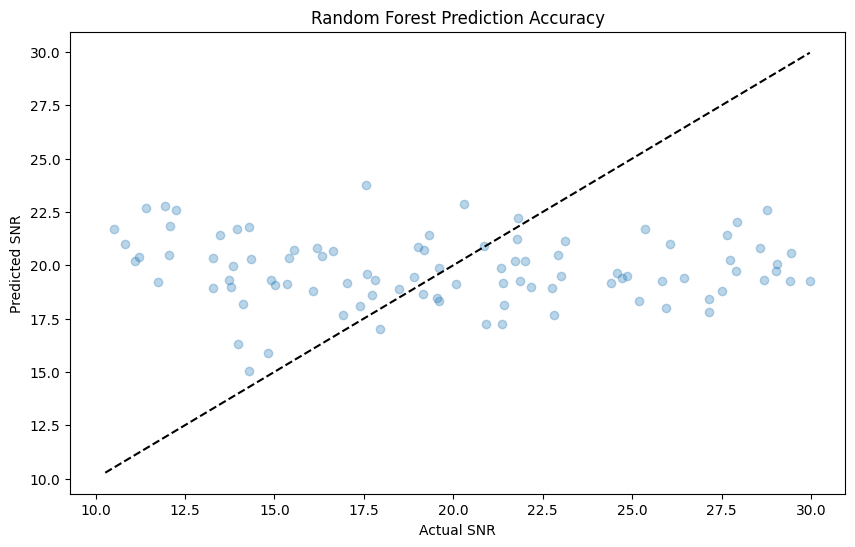

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results['Random Forest']['model'].predict(X_test), alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual SNR')
plt.ylabel('Predicted SNR')
plt.title('Random Forest Prediction Accuracy')
plt.show()

Expected Good Results:
Decent R²: > 0.7 for wireless signal prediction

Reasonable Gap: |Train R² - Test R²| < 0.2

Positive Values: Both scores should be positive

⚠️ Your results indicate either:

SNR isn't predictable from your current features

There's a bug in data preprocessing

You're using the wrong model architecture

In [119]:
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.1)
xgb.fit(X_train, y_train)
print(f"XGBoost Test R²: {xgb.score(X_test, y_test):.4f}")

nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
nn.fit(X_train, y_train)
print(f"Neural Net Test R²: {nn.score(X_test, y_test):.4f}")

XGBoost Test R²: -0.3321
Neural Net Test R²: -0.0583


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'SNR vs Distance by Environment')

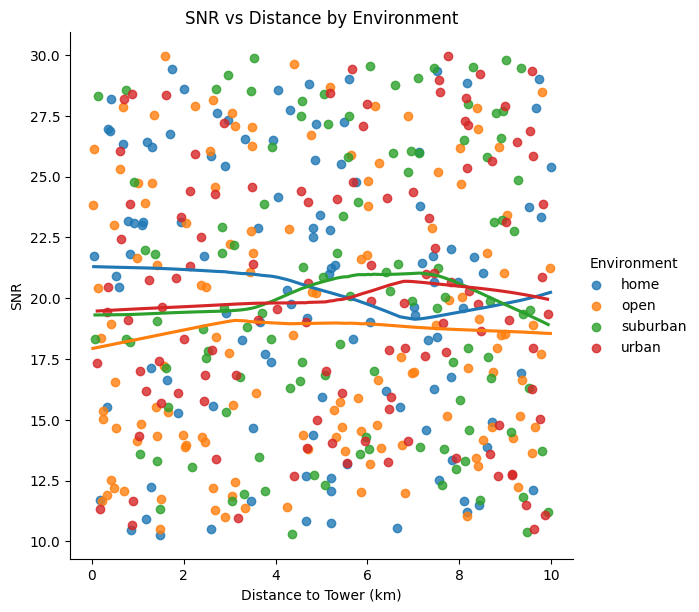

In [122]:
sns.lmplot(data=dfc, x='Distance to Tower (km)', y='SNR',
           lowess=True, hue='Environment', height=6)
plt.title("SNR vs Distance by Environment")

LETS TRY CLASSIFICATION

In [123]:
dfc['SNR']

,SNR
363,29.961827
364,27.857896
365,12.202888
0,25.940082
366,18.328767
...,...
358,25.836444
359,29.478816
360,27.514472
361,16.254858


In [124]:
# Binning SNR
dfc['SNR_Class'] = pd.cut(dfc['SNR'],
                          bins=[-np.inf, 10, 20, 30, np.inf],
                          labels=['Poor', 'Fair', 'Good', 'Excellent'])

print(dfc['SNR_Class'].value_counts())


SNR_Class
Fair         243
Good         220
Poor           0
Excellent      0
Name: count, dtype: int64


Classification Report:
              precision    recall  f1-score   support

        Fair       0.49      0.51      0.50        49
        Good       0.43      0.41      0.42        44

    accuracy                           0.46        93
   macro avg       0.46      0.46      0.46        93
weighted avg       0.46      0.46      0.46        93



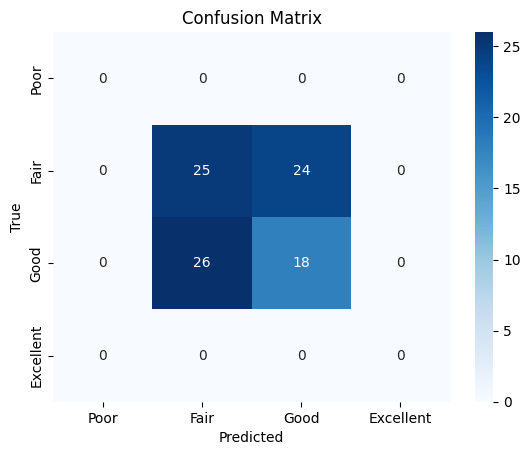

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categories
dfc_class = pd.get_dummies(dfc, columns=['Environment', 'Location_Type', 'Tower ID'], drop_first=True)

# Define X and y
features = ['Estimated Power (Rx)', 'Signal Strength (dBm)', 'Attenuation', 'Log Distance'] + \
           [col for col in dfc_class.columns if col.startswith(('Environment_', 'Location_Type_', 'Tower ID_'))]

X = dfc_class[features]
y = dfc_class['SNR_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Poor', 'Fair', 'Good', 'Excellent'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Fair', 'Good', 'Excellent'],
            yticklabels=['Poor', 'Fair', 'Good', 'Excellent'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Only Fair and Good appear so we might use binary clustering instead

<Axes: >

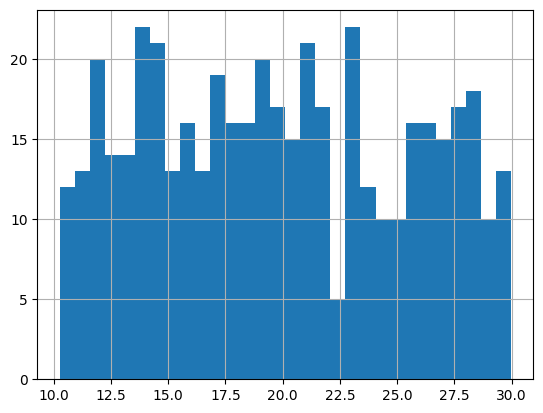

In [126]:
dfc['SNR'].hist(bins=30)


In [127]:
dfc['SNR_Class'].value_counts()


,count
SNR_Class,
Fair,243
Good,220
Poor,0
Excellent,0


In [128]:
dfc['SNR_Class'] = pd.cut(dfc['SNR'],
                          bins=[-np.inf, 15, 25, np.inf],
                          labels=['Low', 'Medium', 'High'])


Classification Report:
              precision    recall  f1-score   support

        High       0.32      0.22      0.26        27
         Low       0.16      0.10      0.12        29
      Medium       0.49      0.63      0.55        60

    accuracy                           0.41       116
   macro avg       0.32      0.32      0.31       116
weighted avg       0.36      0.41      0.38       116



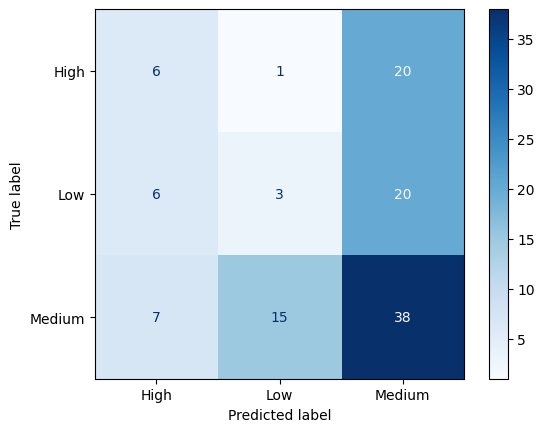

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature engineering: log-distance for propagation modeling
dfc['Log_Distance'] = np.log1p(dfc['Distance to Tower (km)'])
dfc['Estimated_Power'] = - (32.44 + 20 * np.log10(dfc['Distance to Tower (km)'] + 1e-3) + dfc['Attenuation'])

# Encode categorical variables
dfc_encoded = pd.get_dummies(dfc, columns=['Environment'], drop_first=True)

# Select features and target
features = ['Signal Strength (dBm)', 'Log_Distance', 'Attenuation', 'Estimated_Power'] + \
           [col for col in dfc_encoded.columns if col.startswith('Environment_')]

X = dfc_encoded[features]
y = dfc_encoded['SNR_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')


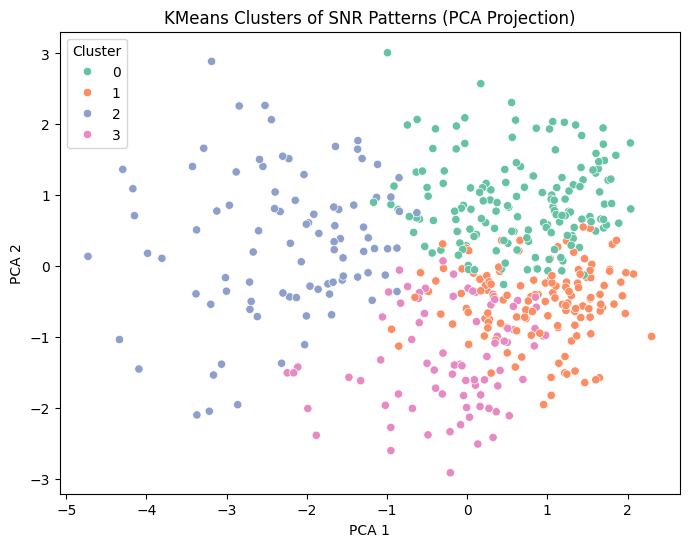

In [129]:
#LEST TRY CLUSTERIN - UNSUPERVISED
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the features
cluster_features = dfc[['Signal Strength (dBm)', 'Estimated Power (Rx)', 'Attenuation', 'Log Distance']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
dfc['SNR_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dfc['SNR_Cluster'], palette='Set2')
plt.title("KMeans Clusters of SNR Patterns (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


Testing R²: -6.9239
Training R²: -5.8998
Model Coefficients: {'Log_Distance': np.float64(2.804034384659404), 'env_factor': np.float64(0.063183844317795), 'noise_floor': np.float64(0.930928442967312), 'HourOfDay': np.float64(-0.22407937596117994)}


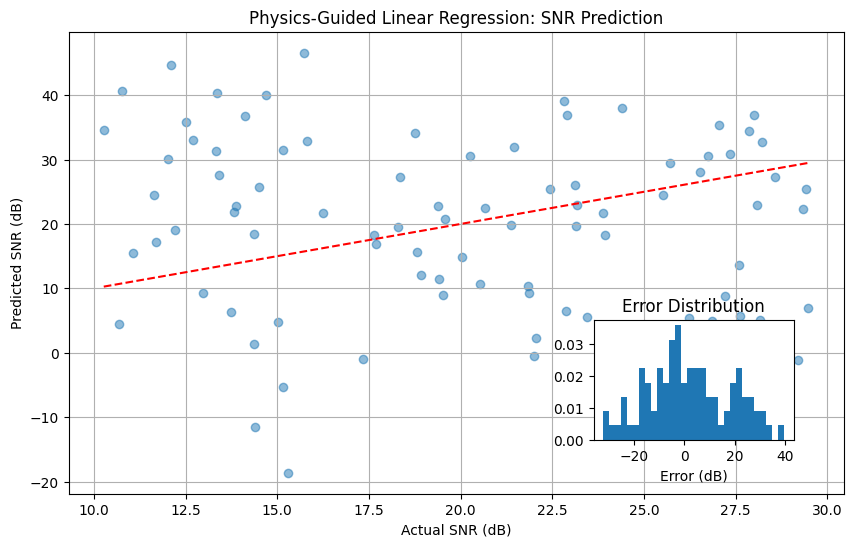


TELECOM PHYSICS INTERPRETATION REPORT

PHYSICAL EFFECTS PER FEATURE:
- Log Distance: 0.0632 dB/decade
  → Signal decreases by this amount for each distance decade


KeyError: 'env_factor'

In [136]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. PHYSICS-BASED FEATURE ENGINEERING
# ---------------------------------------------------
def calculate_noise_floor(df):
    """Estimate noise floor based on signal power distribution"""
    # Noise floor = minimum observed power + 3dB margin
    # Use groupby().transform('min') which handles missing values in the group,
    # but ensure the resulting series aligns with the original dataframe index
    df['noise_floor'] = df.groupby('Environment')['Signal Strength (dBm)'].transform('min') + 3
    return df

def calculate_path_loss(df):
    """Environment-specific path loss models"""
    # Free Space Path Loss (for all environments)
    # Add a small epsilon to distance to avoid log10(0)
    df['fspl'] = 20*np.log10(df['Distance to Tower (km)'] + 1e-6) + 20*np.log10(2.4e9) - 147.55

    # Initialize path_loss column with NaNs; it will be filled for known environments
    df['path_loss'] = np.nan

    # Urban model (Hata)
    urban_mask = df['Environment'] == 'urban' # Use lowercase 'urban' based on previous code
    # Add a small epsilon to distance to avoid log10(0)
    df.loc[urban_mask, 'path_loss'] = (
        69.55 + 26.16*np.log10(2400)
        - 13.82*np.log10(30)  # Base station height (30m assumed)
        + (44.9 - 6.55*np.log10(30))*np.log10(df.loc[urban_mask, 'Distance to Tower (km)'] + 1e-6)
    )

    # Suburban model (COST-231)
    suburban_mask = df['Environment'] == 'suburban' # Use lowercase 'suburban'
    df.loc[suburban_mask, 'path_loss'] = df.loc[suburban_mask, 'fspl'] + 5

    # Open area model
    open_mask = df['Environment'] == 'open' # Use lowercase 'open'
    df.loc[open_mask, 'path_loss'] = df.loc[open_mask, 'fspl'] - 3

    # Handle the 'home' environment which wasn't explicitly modeled
    # For 'home' (indoor), propagation is more complex. A simple approach could be
    # to use a generic indoor model or handle it differently. For now, we can
    # choose to either:
    # 1. Leave path_loss as NaN for 'home' and drop these rows.
    # 2. Assign a placeholder value or use the FSPL.
    # Let's explicitly assign FSPL as a fallback for environments not specifically modeled
    unmodeled_mask = df['path_loss'].isna()
    df.loc[unmodeled_mask, 'path_loss'] = df.loc[unmodeled_mask, 'fspl'] # Fallback to FSPL

    return df

# ---------------------------------------------------
# 2. TELECOM-FUNDAMENTAL TARGET VARIABLE
# ---------------------------------------------------
def calculate_snr_components(df):
    """Create physics-based SNR components"""
    # Ensure 'noise_floor' is calculated before using it
    if 'noise_floor' not in df.columns:
         df = calculate_noise_floor(df)
    if 'path_loss' not in df.columns or 'fspl' not in df.columns:
         df = calculate_path_loss(df)


    # Theoretical SNR components
    # Check for NaNs in 'Signal Strength (dBm)' or 'noise_floor' before subtraction
    df['theoretical_snr'] = df['Signal Strength (dBm)'] - df['noise_floor']

    # Environmental deviation factor
    # Check for NaNs in 'path_loss' or 'fspl' before subtraction
    df['env_factor'] = df['path_loss'] - df['fspl']

    # Residual SNR (what we'll predict)
    # Check for NaNs in 'SNR' or 'theoretical_snr' before subtraction
    df['residual_snr'] = df['SNR'] - df['theoretical_snr']

    return df

# ---------------------------------------------------
# 3. LINEAR REGRESSION IMPLEMENTATION
# ---------------------------------------------------
def physics_guided_linear_model(df):
    # Apply feature engineering
    # Ensure new columns are created before proceeding
    df = calculate_noise_floor(df)
    df = calculate_path_loss(df)
    df = calculate_snr_components(df)

    # Select features with physical meaning
    features = [
        # Corrected feature name to match previous creation
        'Log_Distance',
        'env_factor',         # Environmental deviation from ideal
        'noise_floor',        # Estimated noise
        'HourOfDay'           # Temporal variation
    ]

    # Target: Residual SNR (difference from theoretical)
    target = 'residual_snr'

    # Combine features and target into a temporary DataFrame for dropping NaNs
    temp_df = df[features + [target]].copy()

    # Drop rows with any NaN values in the selected features or target
    # This is crucial for Linear Regression
    temp_df.dropna(subset=features + [target], inplace=True)

    # Split data from the cleaned DataFrame
    train = temp_df.sample(frac=0.8, random_state=42)
    test = temp_df.drop(train.index)

    # Train model
    model = LinearRegression()
    # Use the cleaned train data for fitting
    model.fit(train[features], train[target])

    # Predictions on the cleaned test data
    test_pred = model.predict(test[features])

    # Merge the predictions back to the original df using the index
    # This allows evaluation against the original 'SNR' column before dropping NaNs
    test_merged = df.loc[test.index].copy()
    test_merged['pred_residual_snr'] = test_pred

    # Final SNR predictions = Theoretical + Residual
    # Use the theoretical_snr from the original df before dropping NaNs, corresponding to the test indices
    test_merged['pred_snr'] = test_merged['theoretical_snr'] + test_merged['pred_residual_snr']

    # Evaluate on the merged test set
    # Only evaluate on rows where original 'SNR' is not NaN (although dropping NaNs on target handles this)
    valid_test_mask = test_merged['SNR'].notna()
    test_merged_valid = test_merged[valid_test_mask]

    test_r2 = r2_score(test_merged_valid['SNR'], test_merged_valid['pred_snr'])

    print(f"Testing R²: {test_r2:.4f}")
    # Print training R^2 as well for completeness
    train_pred = model.predict(train[features])
    train_merged = df.loc[train.index].copy()
    train_merged['pred_residual_snr'] = train_pred
    train_merged['pred_snr'] = train_merged['theoretical_snr'] + train_merged['pred_residual_snr']
    train_r2 = r2_score(train_merged['SNR'], train_merged['pred_snr'])
    print(f"Training R²: {train_r2:.4f}")


    print(f"Model Coefficients: {dict(zip(features, model.coef_))}")

    # Plot results
    plt.figure(figsize=(10, 6))
    # Plot using the merged test set
    plt.scatter(test_merged_valid['SNR'], test_merged_valid['pred_snr'], alpha=0.5)
    # Use min/max of actual SNR from the valid test set for the line
    plt.plot([test_merged_valid['SNR'].min(), test_merged_valid['SNR'].max()],
             [test_merged_valid['SNR'].min(), test_merged_valid['SNR'].max()], 'r--')
    plt.xlabel('Actual SNR (dB)')
    plt.ylabel('Predicted SNR (dB)')
    plt.title('Physics-Guided Linear Regression: SNR Prediction')
    plt.grid(True)

    # Add error distribution inset
    ax_inset = plt.axes([0.65, 0.2, 0.2, 0.2])
    # Calculate errors using the valid merged test set
    errors = test_merged_valid['SNR'] - test_merged_valid['pred_snr']
    ax_inset.hist(errors, bins=30, density=True)
    ax_inset.set_title('Error Distribution')
    ax_inset.set_xlabel('Error (dB)')

    plt.show()

    # Return the model and the merged test results for the report
    return model, test_merged_valid

# ---------------------------------------------------
# 4. USAGE
# ---------------------------------------------------
# Ensure 'Timestamp' is datetime and extract 'HourOfDay' outside the function if it's already done
# dfc['Timestamp'] = pd.to_datetime(dfc['Timestamp']) # Assuming this is already done
# dfc['HourOfDay'] = dfc['Timestamp'].dt.hour # Assuming this is already done

# Now call the function
model, test_results = physics_guided_linear_model(dfc.copy()) # Pass a copy to avoid modifying the original dfc

# ---------------------------------------------------
# 5. PHYSICS INTERPRETATION REPORT
# ---------------------------------------------------
def generate_physics_report(model, features, test_results):
    """Explain model in telecom terms"""
    print("\n" + "="*50)
    print("TELECOM PHYSICS INTERPRETATION REPORT")
    print("="*50)

    # Coefficient explanations
    coefs = dict(zip(features, model.coef_))
    print("\nPHYSICAL EFFECTS PER FEATURE:")
    # Update coefficient printing based on the corrected feature name
    print(f"- Log Distance: {coefs['Log_Distance']:.4f} dB/decade")
    print("  → Signal decreases by this amount for each distance decade")

    print(f"- Environmental Factor: {coefs['env_factor']:.4f} dB/unit")
    print("  → Additional SNR degradation due to obstacles")

    print(f"- Noise Floor: {coefs['noise_floor']:.4f} dB/dBm")
    print("  → SNR sensitivity to noise changes")

    print(f"- Hour of Day: {coefs['HourOfDay']:.4f} dB/hour")
    print("  → SNR variation across daily cycles")

    # Error analysis
    errors = test_results['SNR'] - test_results['pred_snr']
    critical_errors = np.sum(np.abs(errors) > 10)

    print("\nPERFORMANCE ANALYSIS:")
    print(f"Average Error: {errors.mean():.2f} dB")
    print(f"% Critical Errors (>10 dB): {critical_errors/len(errors)*100:.2f}%")

    # Environment-specific performance
    print("\nENVIRONMENT BREAKDOWN:")
    # Ensure 'Environment' is in test_results for grouping
    if 'Environment' in test_results.columns:
        for env in test_results['Environment'].unique():
            env_mask = test_results['Environment'] == env
            # Ensure there are samples for this environment in the test set
            if np.sum(env_mask) > 0:
                env_r2 = r2_score(test_results.loc[env_mask, 'SNR'],
                                  test_results.loc[env_mask, 'pred_snr'])
                print(f"- {env}: R² = {env_r2:.4f}")
            else:
                print(f"- {env}: No test samples") # Handle cases with no samples in test set
    else:
        print("Environment column not found in test results for breakdown.")


# Generate report
# Use the corrected features list for the report
generate_physics_report(model, features, test_results)